In [1]:
### Import libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Preparation and Cleaning

- The dataset is taken from https://www.kaggle.com/code/ailenenunez/diabetes-prediction-99-recall-rate/input.

- Handle missing values, outliers, and inconsistencies in key variables (e.g., BMI, HbA1c, blood glucose levels).

- Define categories:
    - Age groups: Under 18, 18-44, 45-64, Over 65
    - BMI categories: Underweight, Healthy weight, Overweight, Obese.
    - Race: African American, Asian, Caucasian, Hispanic, Other.


In [3]:
diabetes_data = pd.read_csv('diabetes_dataset.csv')
diabetes_data.head()


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
# Checking for missing values and overall data structure
missing_values = diabetes_data.isnull().sum()
data_info = diabetes_data.info()

# Displaying summary of missing values and dataset structure
missing_values, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

(year                    0
 gender                  0
 age                     0
 location                0
 race:AfricanAmerican    0
 race:Asian              0
 race:Caucasian          0
 race:Hispanic           0
 race:Other              0
 hypertension            0
 heart_disease           0
 smoking_history         0
 bmi                     0
 hbA1c_level             0
 blood_glucose_level     0
 diabetes                0
 dtype: int64,
 None)

1 - Prevalence of Diabetes within Each Race

In [5]:
#List of race columns to be melted
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']

#Use all columns except race columns as id_vars
id_vars = [col for col in diabetes_data.columns if col not in race_columns]

#Melt the DataFrame to create a 'Race' column and keep all other columns

diabetes_data_melted = diabetes_data.melt(id_vars=id_vars, value_vars=race_columns, var_name='Race', value_name='Indicator')

# Filter the melted DataFrame for rows where the 'Indicator' is 1
# Assuming that 'Indicator' is 1 for the race that applies to that individual
diabetes_data_melted = diabetes_data_melted[diabetes_data_melted['Indicator']== 1]

# Clean up the 'Race' column by removing the 'race:' prefix
diabetes_data_melted['Race'] = diabetes_data_melted['Race'].str.replace('race:', '')

#Drop the 'Indicator' column since it's no longer needed
diabetes_data_melted =diabetes_data_melted.drop(columns=['Indicator'])


#Display the first few rows to verify
print(diabetes_data_melted.head())

#Calculate the prevalence of diabetes by race
diabetes_by_race = diabetes_data_melted.groupby('Race')['diabetes'].mean() * 100

# Display the results
print(diabetes_by_race)

    year  gender   age location  hypertension  heart_disease smoking_history  \
4   2016  Female  52.0  Alabama             0              0           never   
8   2016    Male  51.0  Alabama             0              0           never   
10  2016    Male  15.0  Alabama             0              0         No Info   
12  2015  Female   3.0  Alabama             0              0         No Info   
22  2016    Male  42.0  Alabama             0              0           never   

      bmi  hbA1c_level  blood_glucose_level  diabetes             Race  
4   23.75          6.5                   90         0  AfricanAmerican  
8   38.14          6.0                  100         0  AfricanAmerican  
10  19.15          6.6                  200         0  AfricanAmerican  
12  20.28          3.5                  159         0  AfricanAmerican  
22  27.32          6.0                  160         0  AfricanAmerican  
Race
AfricanAmerican    8.742521
Asian              8.708469
Caucasian          8

In [6]:
print(diabetes_data_melted.columns)
#Prevalence of diabetes by race and gender
diabetes_by_race_gender = diabetes_data_melted.groupby(['Race','gender'])['diabetes'].mean() * 100
print(diabetes_by_race_gender)

Index(['year', 'gender', 'age', 'location', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level',
       'diabetes', 'Race'],
      dtype='object')
Race             gender
AfricanAmerican  Female     7.876683
                 Male       9.959591
                 Other      0.000000
Asian            Female     7.519631
                 Male      10.389297
                 Other      0.000000
Caucasian        Female     7.566323
                 Male       9.614440
                 Other      0.000000
Hispanic         Female     7.611413
                 Male       9.572670
                 Other      0.000000
Other            Female     7.518155
                 Male       9.202750
                 Other      0.000000
Name: diabetes, dtype: float64


In [7]:
# Reference:    https://www2.census.gov/library/publications/decennial/2020/census-briefs/c2020br-06.pdf 
'''
  Selected age group:
  Group 1) Under 18 years
  Group 2) 18 to 44 years
  Group 3) 45 to 64 years
  Group 4) 65 years and over
'''
age_group_order = ["Under 18", "18-44", "45-64", "Over 65"]

def bin_age(p_age):
    try:
        if p_age < 18:
            binned_group = "Under 18"
        elif 18 <= p_age < 45:
            binned_group = "18-44"
        elif 45 <= p_age < 65:
            binned_group = "45-64"
        elif p_age >= 65:
            binned_group = "Over 65"
        else:
            binned_group = "unknown"
            raise ValueError(f"Unexpected age value: {p_age}")
        
        return binned_group
    except ValueError as e:
        print(f"(ERROR) {e}")
        return "unknown"
    
diabetes_data_melted['age_group'] = diabetes_data_melted['age'].apply(bin_age)


In [8]:
'''
Weight group: 
Underweight) Less than 18.5
Healthy Weight) 18.5 to less than 25
Overweight) 25 to less than 30
Obesity) 30 or greater 
'''
def bin_bmi(p_bmi):
    try:
        if p_bmi < 18.5:
            binned_group = "underweight"
        elif 18.5 <= p_bmi < 25:
            binned_group = "healthy_weight"
        elif 25 <= p_bmi < 30:
            binned_group = "overweight"
        elif p_bmi >= 30:
            binned_group = "obesity"
        else:
            binned_group = "unknown"
            raise ValueError(f"Unexpected BMI value: {p_bmi}")
        
        return binned_group
    except ValueError as e:
        print(f"(ERROR) {e}")
        return "unknown"

diabetes_data_melted['bmi_category'] = diabetes_data_melted['bmi'].apply(bin_bmi)

In [9]:
'''
Normal: A1C below 5.7%
Prediabetes: A1C between 5.7% and 6.4%
Diabetes: A1C of 6.5% or higher
'''

# Reference: https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/
def bin_hemoglobin(p_hba1c):
    try:
        if p_hba1c < 5.7:
            binned_group = "normal"
        elif 5.7 <= p_hba1c < 6.4:
            binned_group = "prediabetes"
        elif p_hba1c >= 6.4:
            binned_group = "diabetes"
        else:
            binned_group = "unknown"
            raise ValueError(f"Unexpected HbA1c value: {p_hba1c}")
        
        return binned_group
    except ValueError as e:
        print(f"(ERROR) {e}")
        return "unknown"

### 2. Exploratory Data Analysis (EDA)

- Descriptive Statistics:
Calculate mean, median, and distributions of age, BMI, HbA1c, and blood glucose.

- Visualizations:
Create histograms, boxplots, and bar charts to compare diabetes prevalence by race, gender, and other factors.


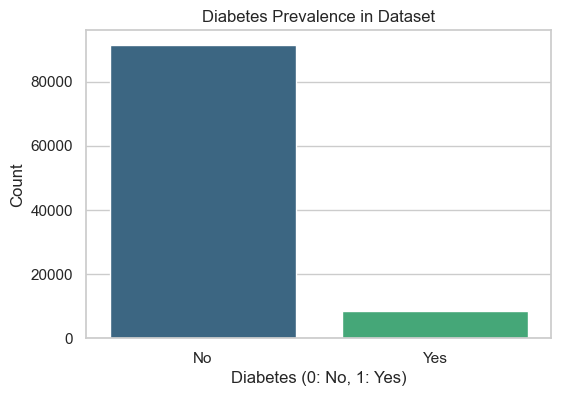

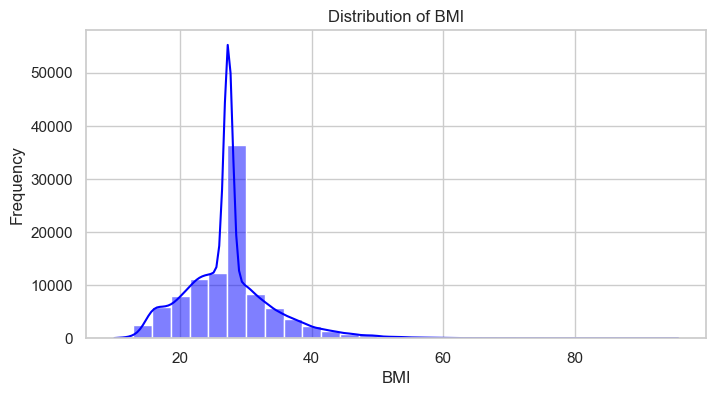

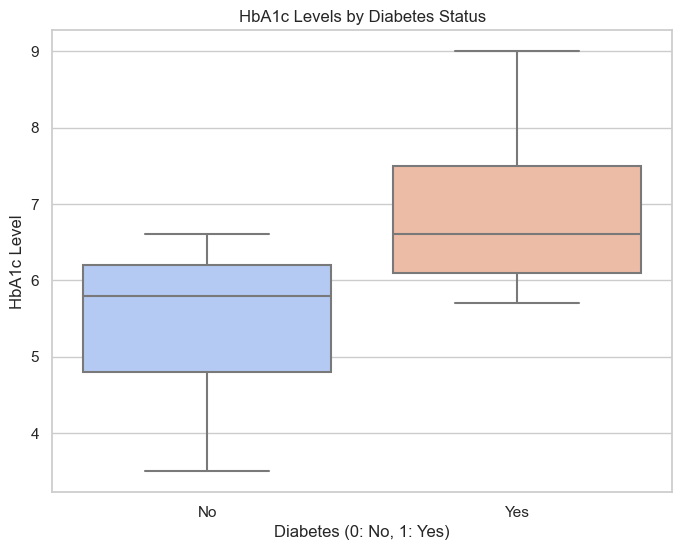

In [10]:
sns.set(style="whitegrid")

# Visualizing the prevalence of diabetes in the dataset
diabetes_counts = diabetes_data['diabetes'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette="viridis")
plt.title("Diabetes Prevalence in Dataset")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# Visualizing the distribution of BMI
plt.figure(figsize=(8, 4))
sns.histplot(diabetes_data['bmi'], kde=True, color='blue', bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Visualizing HbA1c levels by diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='hbA1c_level', data=diabetes_data, palette="coolwarm")
plt.title("HbA1c Levels by Diabetes Status")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("HbA1c Level")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()


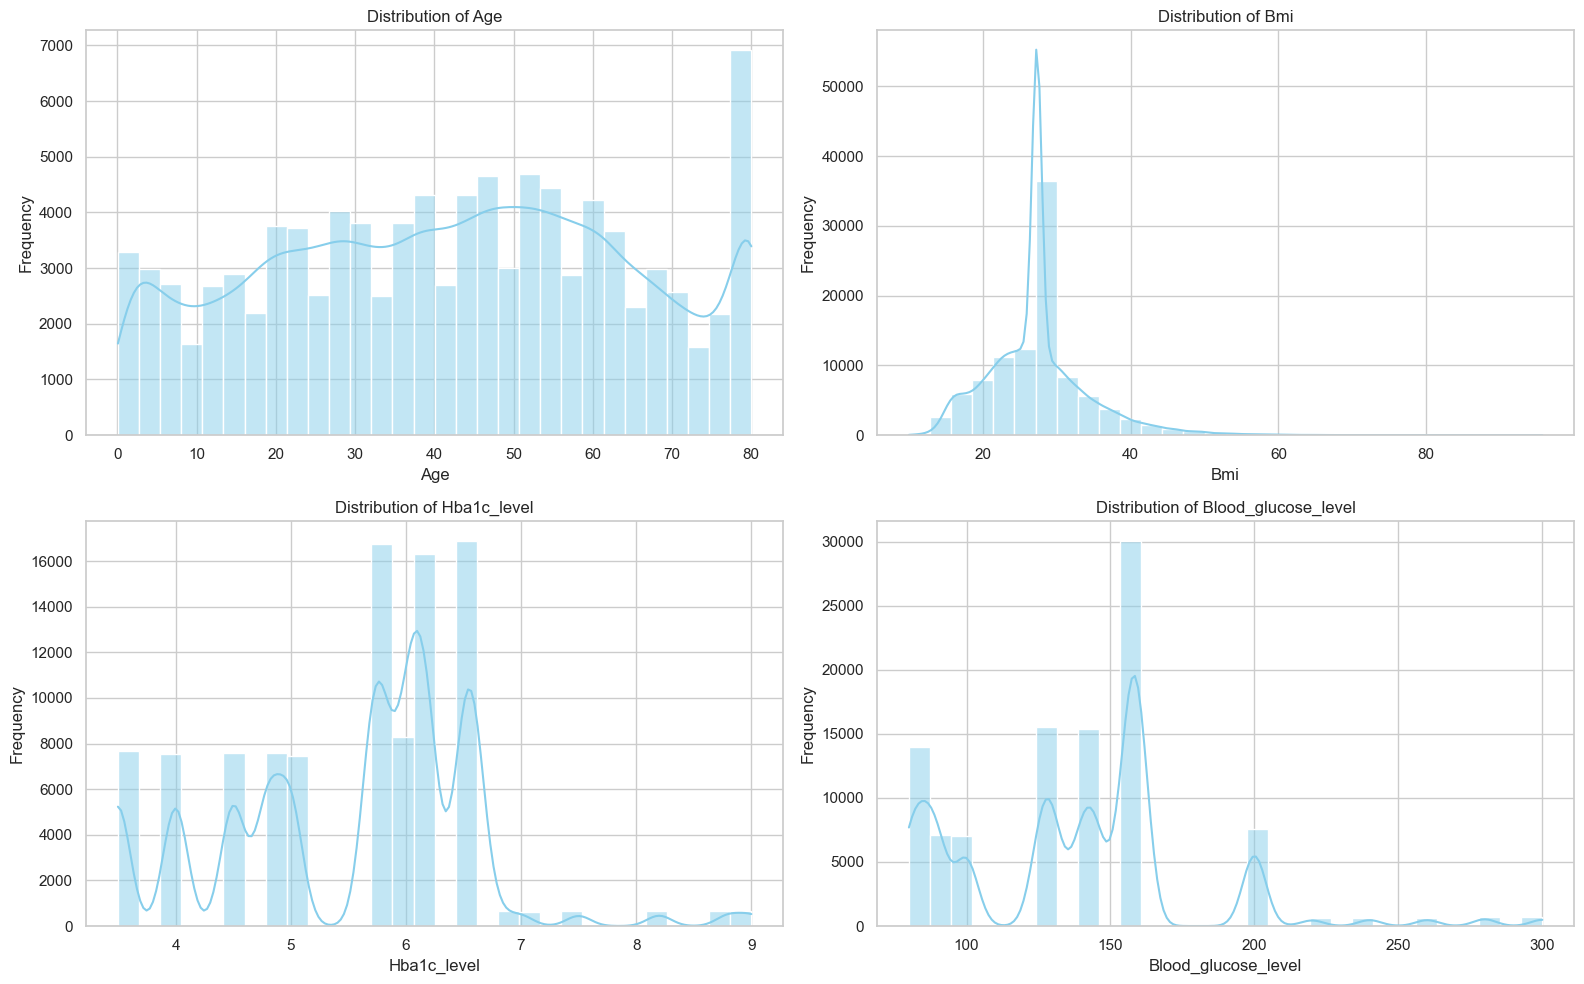

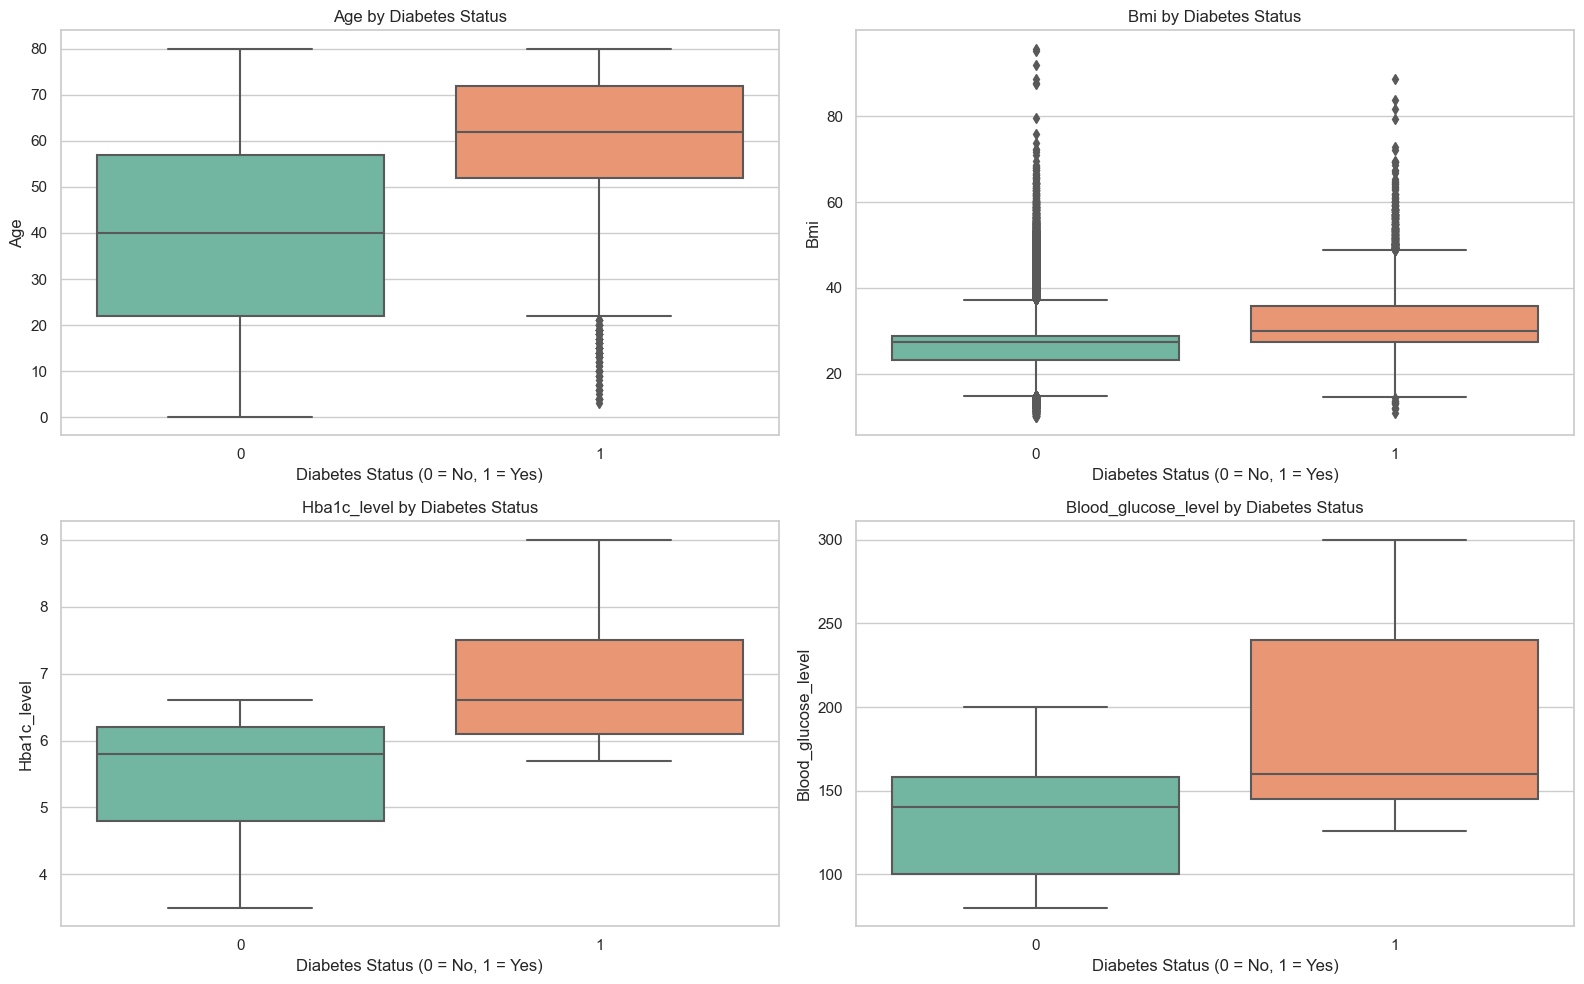

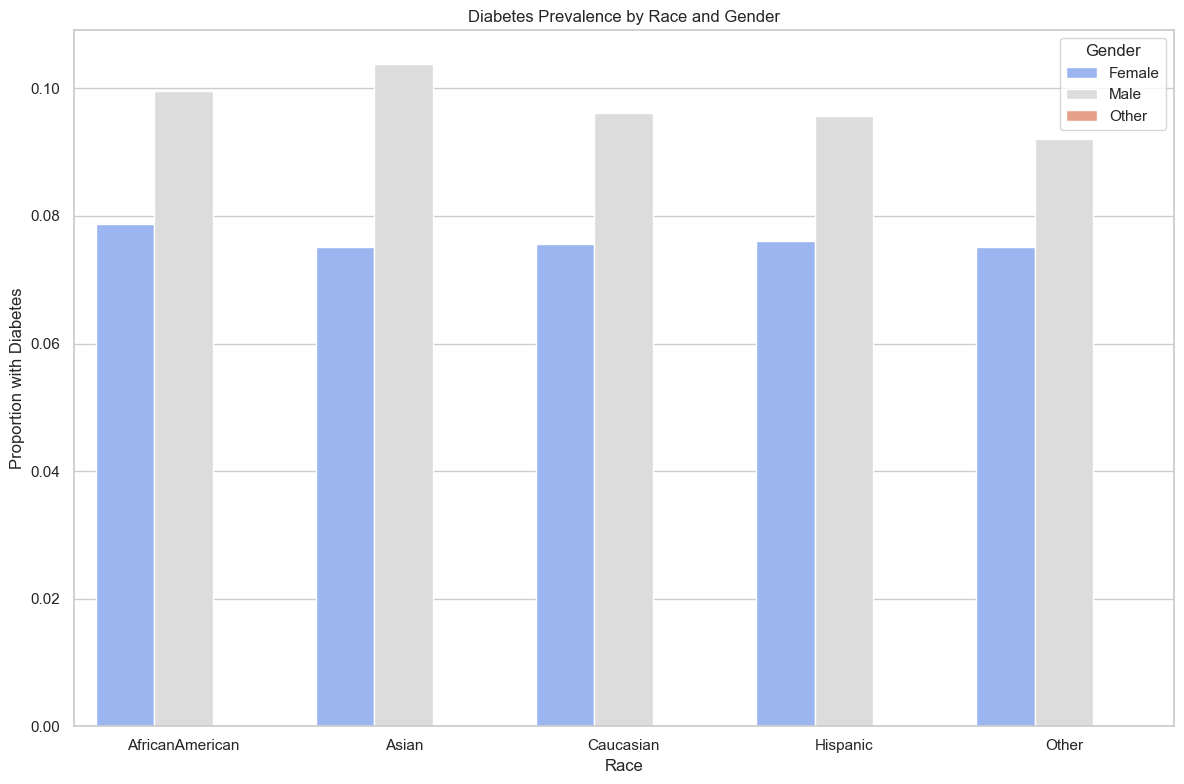

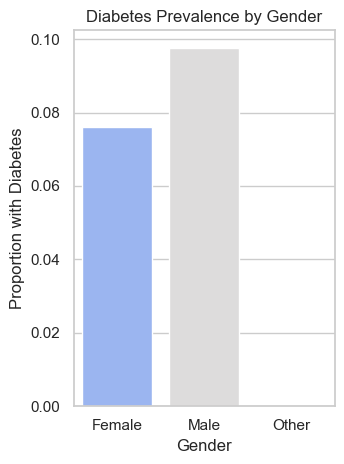

In [11]:
# Descriptive Statistics
descriptive_stats = diabetes_data_melted[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']].describe()

# Visualizations
# 1. Histograms for continuous variables
plt.figure(figsize=(16, 10))
for i, column in enumerate(['age', 'bmi', 'hbA1c_level', 'blood_glucose_level'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(diabetes_data_melted[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Boxplots for continuous variables by diabetes status
plt.figure(figsize=(16, 10))
for i, column in enumerate(['age', 'bmi', 'hbA1c_level', 'blood_glucose_level'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diabetes', y=column, data=diabetes_data_melted, palette='Set2')
    plt.title(f'{column.capitalize()} by Diabetes Status')
    plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
    plt.ylabel(column.capitalize())
plt.tight_layout()
plt.show()


# 3. Bar charts for diabetes prevalence by race and gender

race_gender_prevalence = diabetes_data_melted.groupby(['Race', 'gender'])['diabetes'].mean().reset_index()

# Plotting diabetes prevalence by Race and Gender
plt.figure(figsize=(12, 8))
sns.barplot(x='Race', y='diabetes', hue='gender', data=race_gender_prevalence, palette='coolwarm')
plt.title('Diabetes Prevalence by Race and Gender')
plt.ylabel('Proportion with Diabetes')
plt.xlabel('Race')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Prevalence by Gender
gender_prevalence = diabetes_data_melted.groupby('gender')['diabetes'].mean().reset_index()
plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='diabetes', data=gender_prevalence, palette='coolwarm')
plt.title('Diabetes Prevalence by Gender')
plt.ylabel('Proportion with Diabetes')
plt.xlabel('Gender')

plt.tight_layout()
plt.show()


Descriptive Statistics by Age Group and BMI Category:
                          hbA1c_level  blood_glucose_level
age_group bmi_category                                    
Under 18  healthy_weight     5.405471           132.848554
          obesity            5.477856           134.080395
          overweight         5.425290           133.114739
          underweight        5.412025           133.152889
18-44     healthy_weight     5.408815           133.415442
          obesity            5.484799           136.709188
          overweight         5.422213           133.765077
          underweight        5.404797           134.599631
45-64     healthy_weight     5.477876           135.839748
          obesity            5.741234           146.756550
          overweight         5.533572           138.475916
          underweight        5.455392           132.774510
Over 65   healthy_weight     5.608851           139.275527
          obesity            5.903283           153.735184
  

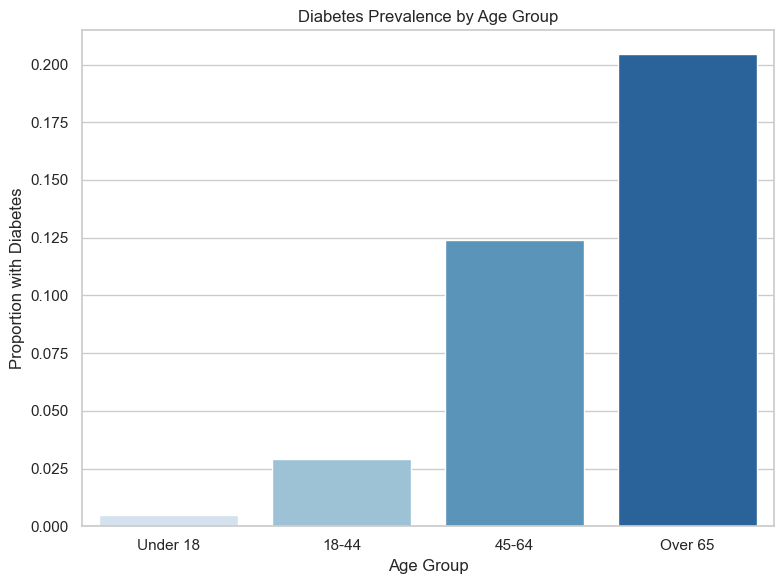

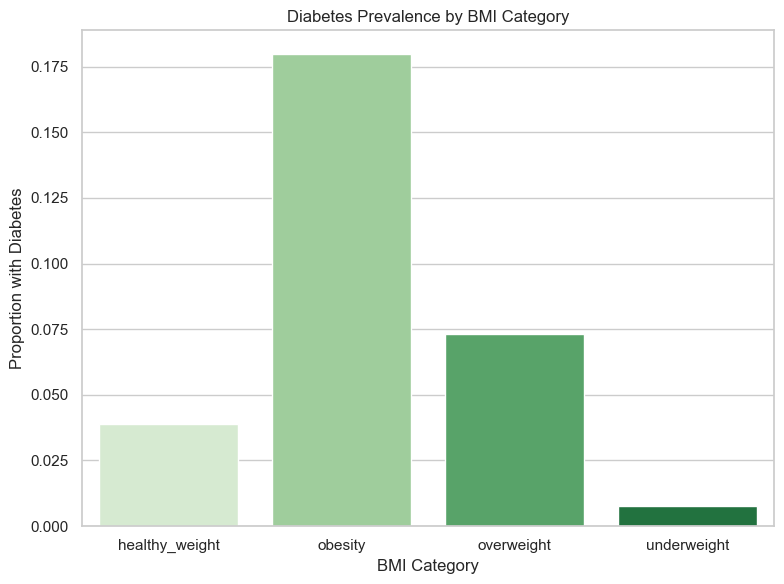

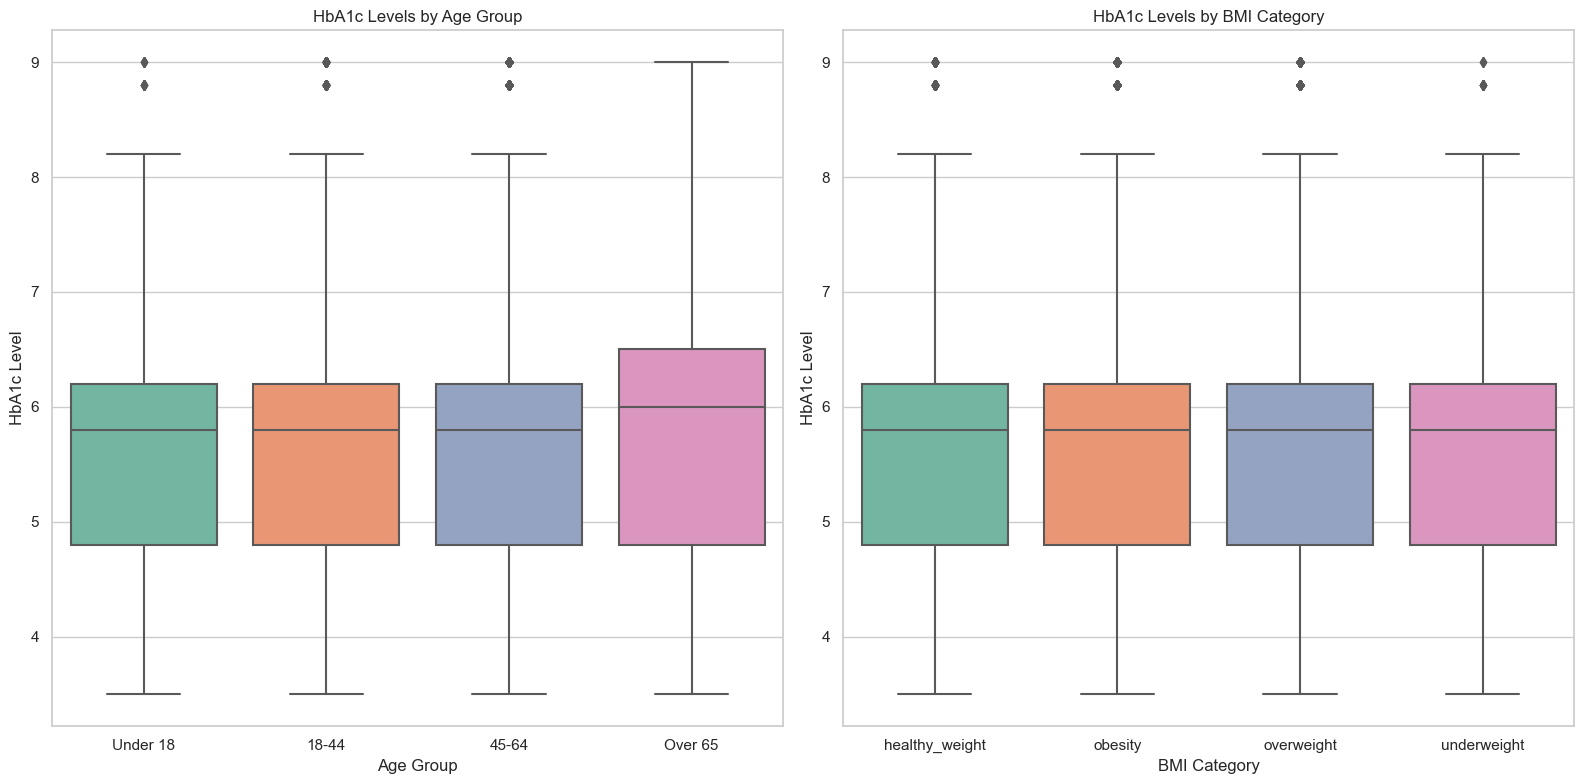

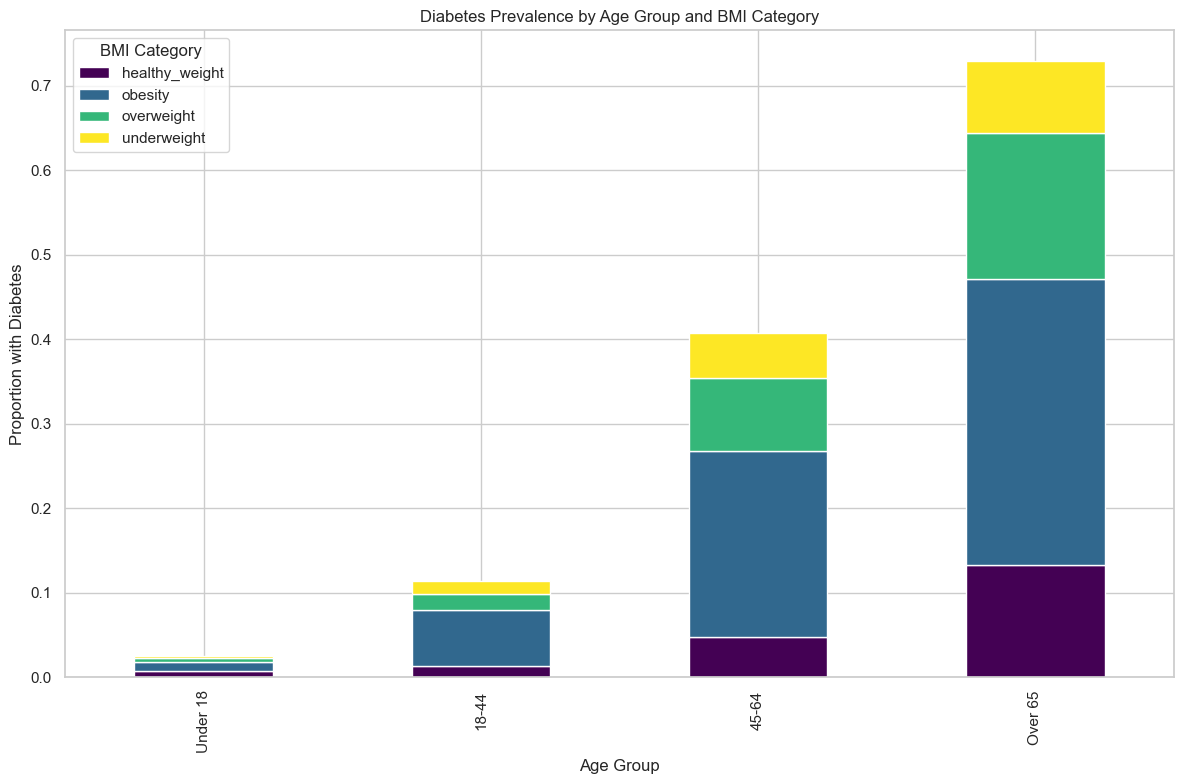

In [12]:
# 1. Descriptive Statistics for Age Groups and BMI Categories
diabetes_data_melted['age_group'] = pd.Categorical(diabetes_data_melted['age_group'], categories=age_group_order, ordered=True)
age_bmi_stats = diabetes_data_melted.groupby(['age_group', 'bmi_category'])[['hbA1c_level', 'blood_glucose_level']].mean()
print("Descriptive Statistics by Age Group and BMI Category:")
print(age_bmi_stats)

# 2. Visualizations

# 2.1. Bar Chart for Diabetes Prevalence by Age Group
plt.figure(figsize=(8, 6))
age_group_prevalence = diabetes_data_melted.groupby('age_group')['diabetes'].mean().reset_index()
sns.barplot(x='age_group', y='diabetes', data=age_group_prevalence, palette='Blues')
plt.title('Diabetes Prevalence by Age Group')
plt.ylabel('Proportion with Diabetes')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

# 2.2. Bar Chart for Diabetes Prevalence by BMI Category
plt.figure(figsize=(8, 6))
bmi_category_prevalence = diabetes_data_melted.groupby('bmi_category')['diabetes'].mean().reset_index()
sns.barplot(x='bmi_category', y='diabetes', data=bmi_category_prevalence, palette='Greens')
plt.title('Diabetes Prevalence by BMI Category')
plt.ylabel('Proportion with Diabetes')
plt.xlabel('BMI Category')
plt.tight_layout()
plt.show()

# 2.3. Boxplots for HbA1c Levels by Age Group and BMI Category
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='age_group', y='hbA1c_level', data=diabetes_data_melted, palette='Set2')
plt.title('HbA1c Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('HbA1c Level')

plt.subplot(1, 2, 2)
sns.boxplot(x='bmi_category', y='hbA1c_level', data=diabetes_data_melted, palette='Set2')
plt.title('HbA1c Levels by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('HbA1c Level')

plt.tight_layout()
plt.show()

# 3. Combine Age Group and BMI Category in Prevalence Analysis
combined_prevalence = diabetes_data_melted.groupby(['age_group', 'bmi_category'])['diabetes'].mean().unstack()
combined_prevalence.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Diabetes Prevalence by Age Group and BMI Category')
plt.ylabel('Proportion with Diabetes')
plt.xlabel('Age Group')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()


### 3. Statistical Analyses

- A. Bootstrapping: Confidence Intervals for Diabetes Proportion
 
- B. HbA1c Differences by Race
    - ANOVA Test: Test if HbA1c levels differ significantly among racial groups.

- C. BMI Distribution
    - Chi-Square Test: Evaluate if BMI category distributions differ significantly across racial groups.

- D. Correlation Analysis
    - Assess the relationships between age, BMI, HbA1c, and diabetes status using Pearson correlation coefficients.
    
- E. Probability in each group between the success factors (predictors) AND gender

- F. Correlation matrix for being Diabetic /Male/Female across all races and predictors.


In [13]:
# A. Bootstrapping: Confidence Intervals for Diabetes Proportion 

import numpy as np
# Bootstrapping function to calculate the proportion of diabetes

def bootstrap_proportion(data, n_iterations=1000):
    proportions = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        proportions.append(np.mean(sample))
    return np.percentile(proportions, [2.5, 97.5])

# Confidence intervals for diabetes proportion
diabetes_prop_ci = bootstrap_proportion(diabetes_data_melted['diabetes'])
print(f"95% Confidence Interval for diabetes proportion: {diabetes_prop_ci}")

95% Confidence Interval for diabetes proportion: [0.08334 0.08663]


In [14]:
# B. if HbA1c levels differ significantly across different races.

import statsmodels.api as sm
from statsmodels.formula.api import ols

#ANOVA for HbA1c levels across races
model =ols('hbA1c_level ~ C(Race)', data=diabetes_data_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq       df         F    PR(>F)
C(Race)        2.376157      4.0  0.518196  0.722374
Residual  114630.350339  99995.0       NaN       NaN


In [15]:
# C. BMI Distribution

from scipy.stats import chisquare
# Observed counts of BMI categories
observed_counts = diabetes_data_melted['bmi_category'].value_counts().sort_index()
# Total number of observations
total_count = observed_counts.sum()


# Expected counts based on given proportions
expected_proportions = [0.1, 0.4, 0.3, 0.2]
expected_counts = [p * total_count for p in expected_proportions]

# Chi-square goodness of fit test

chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f"Chi-square stat: {chi2_stat}, p-value: {p_value}")

Chi-square stat: 36596.18033333334, p-value: 0.0


In [16]:
# D. Correlation matrix between selected features and diabetes

correlation_matrix = diabetes_data_melted[['age', 'bmi', 'hbA1c_level', 'diabetes']].corr()
print(correlation_matrix)

                  age       bmi  hbA1c_level  diabetes
age          1.000000  0.337396     0.101354  0.258008
bmi          0.337396  1.000000     0.082997  0.214357
hbA1c_level  0.101354  0.082997     1.000000  0.400660
diabetes     0.258008  0.214357     0.400660  1.000000


In [17]:
# E. Probability in each group between the success factors (predictors) AND gender

file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


columns_to_keep = ['year', 'gender', 'age', 'location', 'hypertension', 'heart_disease', 
                   'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']


race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']


df_race = df.melt(id_vars=columns_to_keep, 
                  value_vars=race_columns, 
                  var_name='race', 
                  value_name='is_race')


df_race = df_race[df_race['is_race'] == 1].drop(columns=['is_race'])


df_race['race'] = df_race['race'].str.replace('race:', '')

df_race['gender'] = df_race['gender'].str.strip().str[0].str.upper()


df_race = df_race[df_race['smoking_history'].notna()]  # Remove rows with NaN
df_race = df_race[~df_race['smoking_history'].str.lower().isin(['no info', 'not available', 'unknown'])]  # Remove variations of "no info"


bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']


df_race['bmi_category'] = pd.cut(df_race['bmi'], bins=bins, labels=labels, right=False)


unique_races = df_race['race'].unique()


for race in unique_races:
    df_race_filtered = df_race[df_race['race'] == race]  # Filter by race
    
   
    for bmi_category in labels:
        df_bmi = df_race_filtered[df_race_filtered['bmi_category'] == bmi_category]  # Filter by BMI
        
 
        total_females = len(df_bmi[df_bmi['gender'] == 'F'])
        total_males = len(df_bmi[df_bmi['gender'] == 'M'])
        
        
        diabetic_females = len(df_bmi[(df_bmi['gender'] == 'F') & (df_bmi['diabetes'] == 1)])
        diabetic_males = len(df_bmi[(df_bmi['gender'] == 'M') & (df_bmi['diabetes'] == 1)])
        
       
        p_female_diabetic = diabetic_females / total_females if total_females != 0 else 0
        p_male_diabetic = diabetic_males / total_males if total_males != 0 else 0
        
      
        print(f"Probability of being {race} & {bmi_category} & diabetic if Female: {p_female_diabetic:.2f}")
        print(f"Probability of being {race} & {bmi_category} & diabetic if Male: {p_male_diabetic:.2f}")


Probability of being AfricanAmerican & Underweight & diabetic if Female: 0.02
Probability of being AfricanAmerican & Underweight & diabetic if Male: 0.02
Probability of being AfricanAmerican & Healthy weight & diabetic if Female: 0.04
Probability of being AfricanAmerican & Healthy weight & diabetic if Male: 0.07
Probability of being AfricanAmerican & Overweight & diabetic if Female: 0.08
Probability of being AfricanAmerican & Overweight & diabetic if Male: 0.11
Probability of being AfricanAmerican & Obesity & diabetic if Female: 0.18
Probability of being AfricanAmerican & Obesity & diabetic if Male: 0.22
Probability of being Asian & Underweight & diabetic if Female: 0.01
Probability of being Asian & Underweight & diabetic if Male: 0.01
Probability of being Asian & Healthy weight & diabetic if Female: 0.04
Probability of being Asian & Healthy weight & diabetic if Male: 0.07
Probability of being Asian & Overweight & diabetic if Female: 0.07
Probability of being Asian & Overweight & diabe

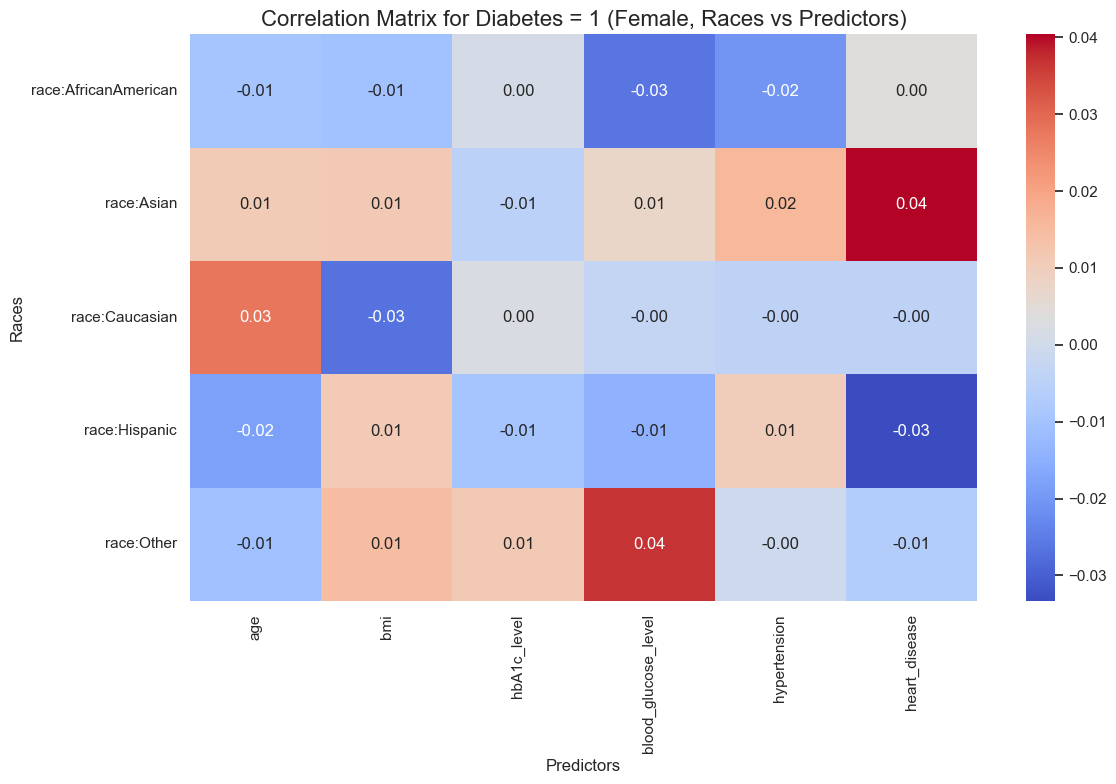

In [18]:
# F. Correlation matrix for being Diabetic /Male/Female across all races and predictors.
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_female = df[(df['diabetes'] == 1) & (df['gender'].str.strip().str.lower() == 'female')]


predictors = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
races = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']


correlation_matrix_female = pd.DataFrame(index=races, columns=predictors)

for race in races:
    for predictor in predictors:
        if race in df_female and predictor in df_female:
            correlation_matrix_female.loc[race, predictor] = df_female[race].corr(df_female[predictor])

correlation_matrix_female = correlation_matrix_female.astype(float)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_female, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix for Diabetes = 1 (Female, Races vs Predictors)', fontsize=16)
plt.xlabel('Predictors')
plt.ylabel('Races')
plt.xticks(rotation=90) 
plt.yticks(rotation=360)  
plt.tight_layout()
plt.show()

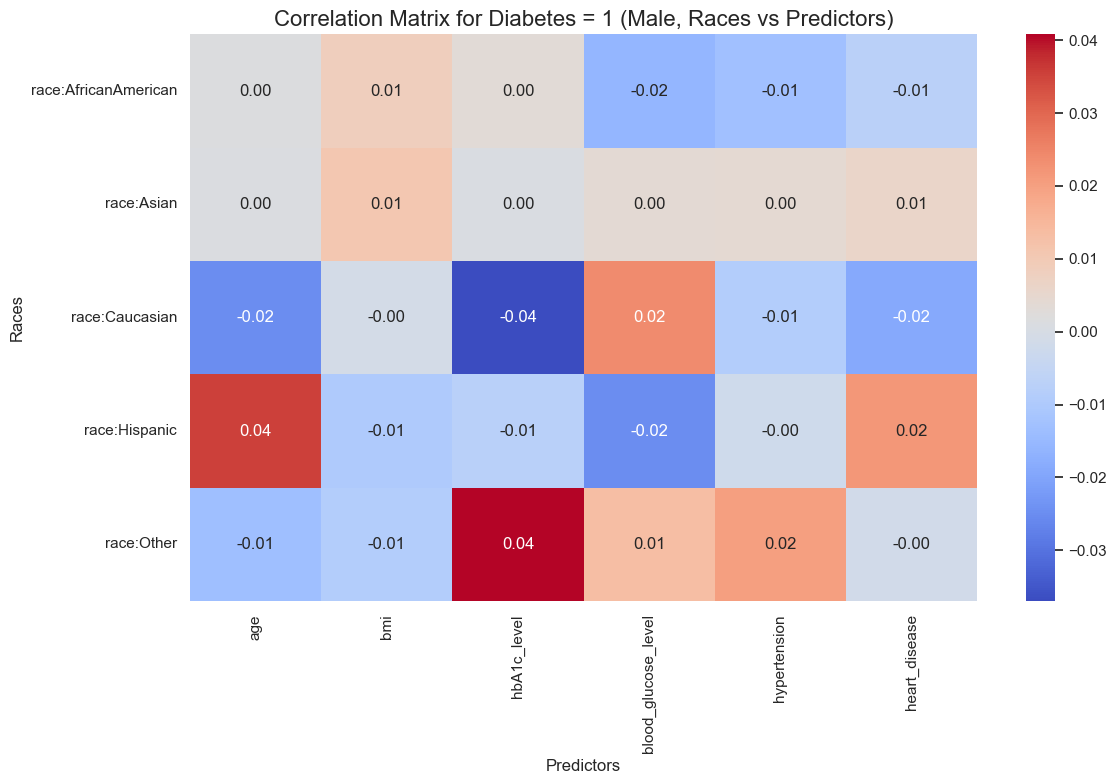

In [19]:
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_male = df[(df['diabetes'] == 1) & (df['gender'].str.strip().str.lower() == 'male')]


predictors = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
races = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']


correlation_matrix_male = pd.DataFrame(index=races, columns=predictors)


for race in races:
    for predictor in predictors:
        if race in df_male and predictor in df_male:
            correlation_matrix_male.loc[race, predictor] = df_male[race].corr(df_male[predictor])


correlation_matrix_male = correlation_matrix_male.astype(float)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_male, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix for Diabetes = 1 (Male, Races vs Predictors)', fontsize=16)
plt.xlabel('Predictors')
plt.ylabel('Races')
plt.xticks(rotation=90)  
plt.yticks(rotation=360) 
plt.tight_layout()
plt.show()

### 4. Logistic Regression Model

- Model Features: Hypertension, Heart disease, Age, BMI, race, hbA1c_level, blood_glucose_level, and smoking history.
- Outcome Variable: Diabetes status (1 = Diabetic, 0 = Non-Diabetic).
- Performance Metrics: Evaluate using accuracy, precision, recall, and ROC-AUC.

To model the likelihood of diabetes based on risk factors and calculate the significance of each variable. Logistic Regression model is created for each predictor as well.

#### 'race:AfricanAmerican'

Optimization terminated successfully.
         Current function value: 0.127676
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                20223
Model:                          Logit   Df Residuals:                    20212
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5694
Time:                        19:53:38   Log-Likelihood:                -2582.0
converged:                       True   LL-Null:                       -5996.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -25.3764      0.575    -44.102      0.000   

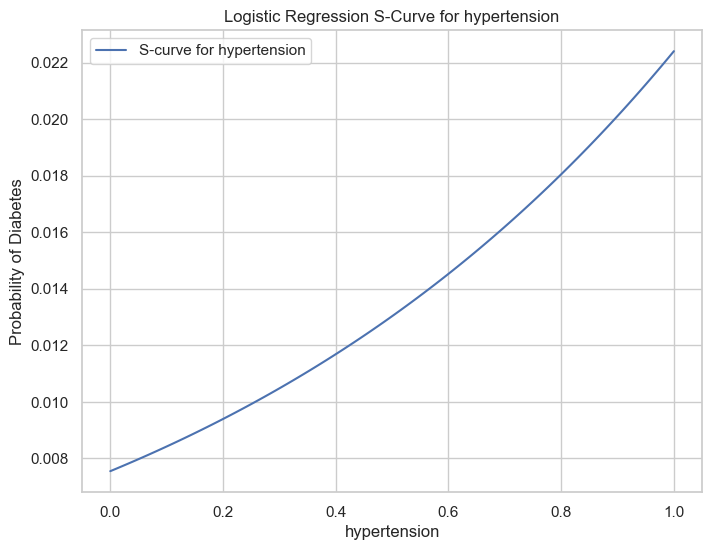

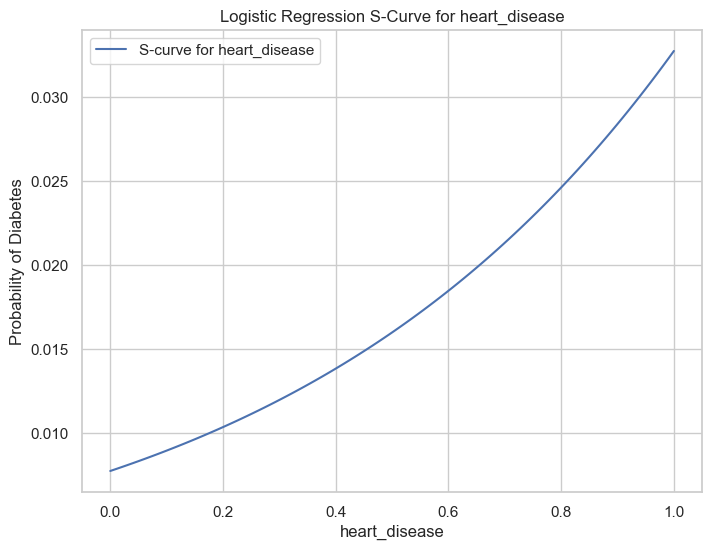

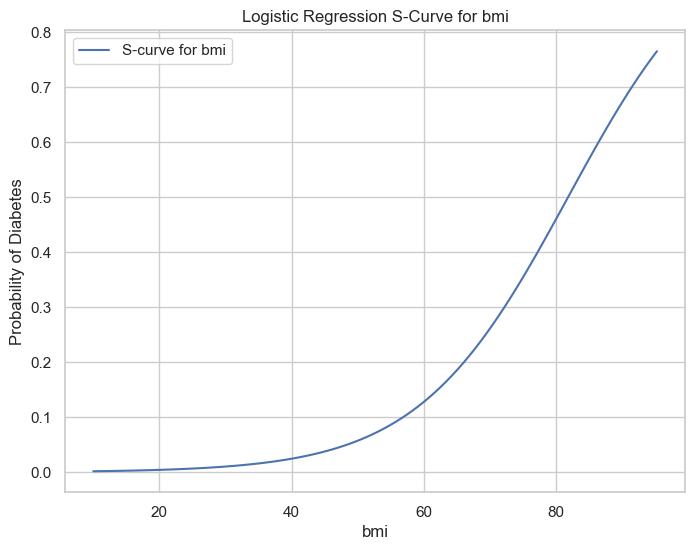

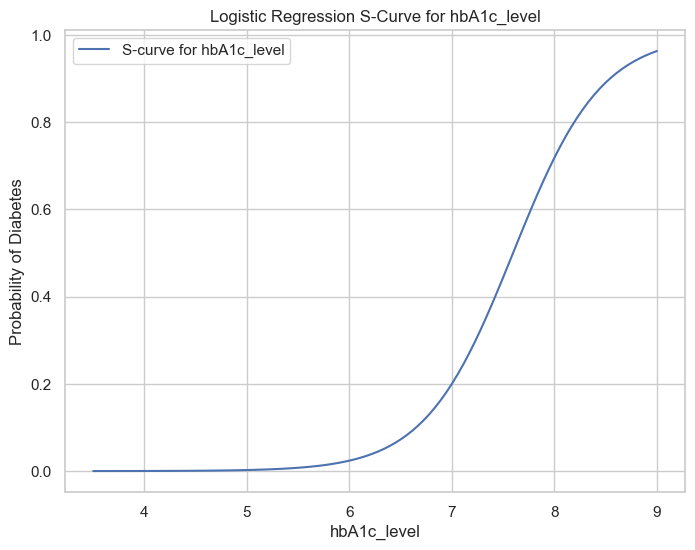

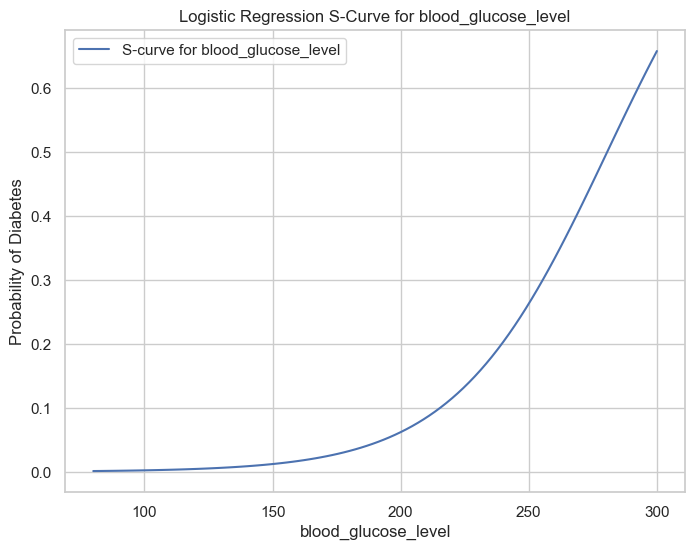

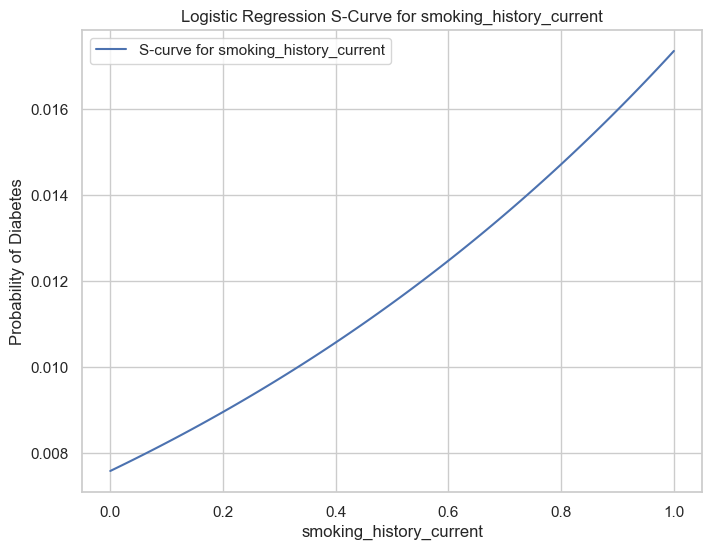

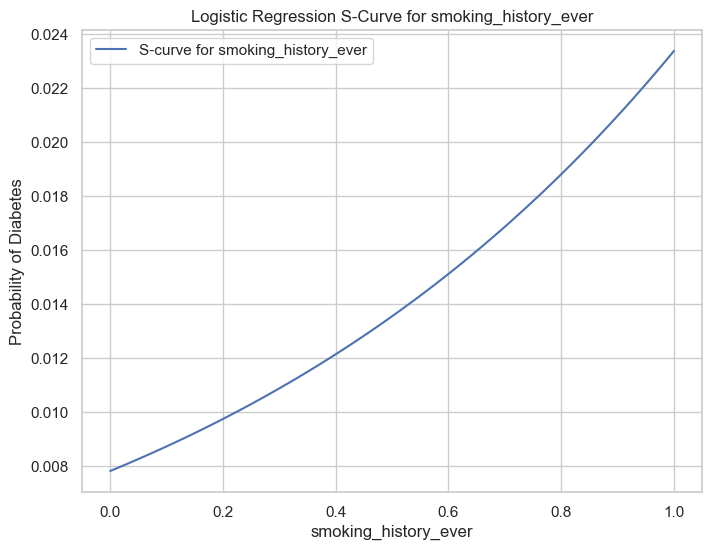

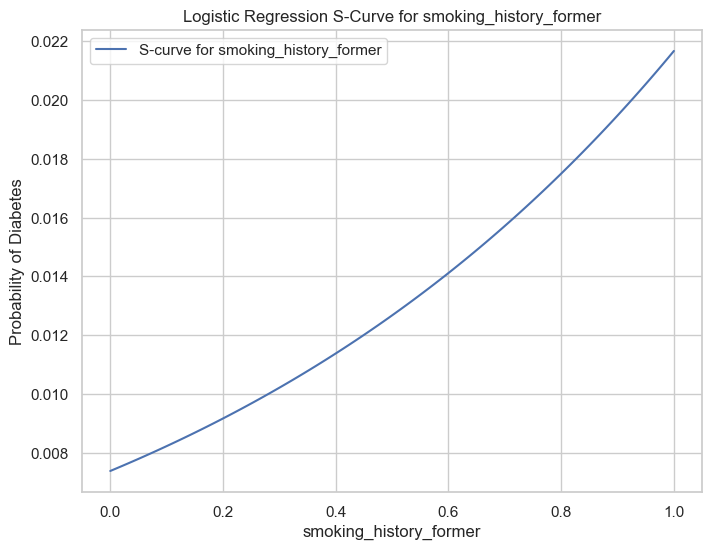

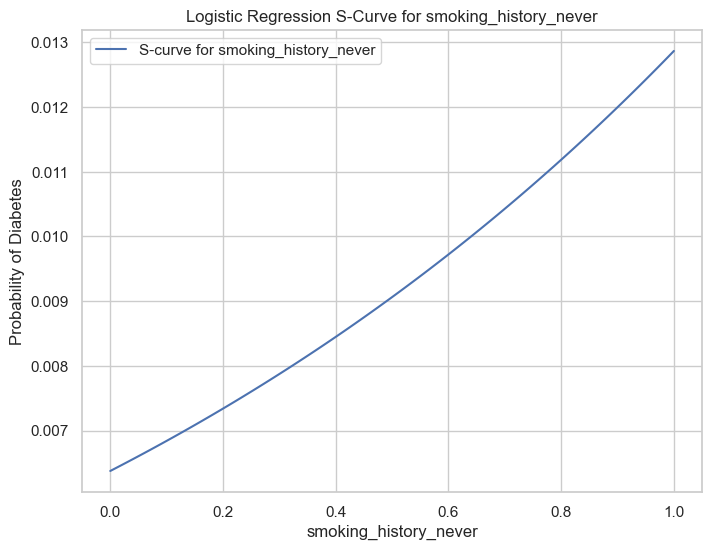

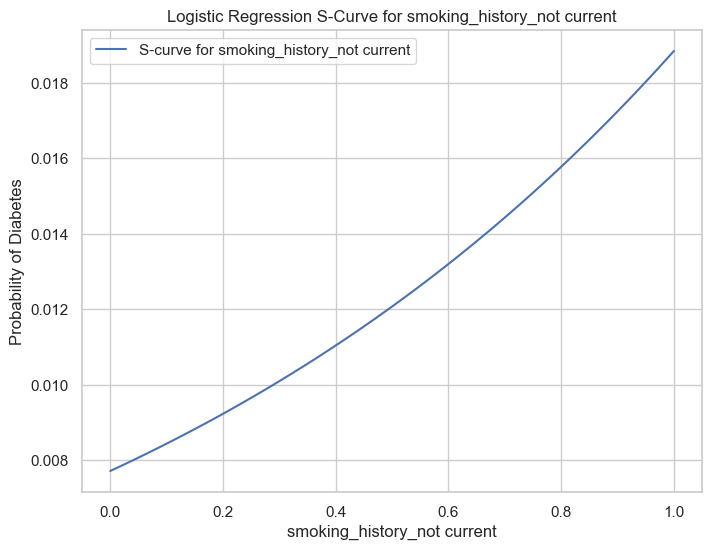

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)

df_african_american = df[df['race:AfricanAmerican'] == 1]

y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'smoking_history']]
X = pd.get_dummies(X, columns=['smoking_history'], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)


X = sm.add_constant(X)


try:
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
except Exception as e:
    print(f"Error: {e}")


try:
    intercept = logit_model.params['const']
    coefficients = logit_model.params.drop('const').to_dict()

    
    for predictor in coefficients.keys():
        predictor_range = np.linspace(X[predictor].min(), X[predictor].max(), 100)
        X_scurve = pd.DataFrame({col: [X[col].mean()] * 100 for col in coefficients.keys()})
        X_scurve[predictor] = predictor_range
        X_scurve['const'] = 1
        X_scurve['Logit(p)'] = intercept + np.dot(X_scurve[coefficients.keys()], list(coefficients.values()))
        X_scurve['Probability (p)'] = 1 / (1 + np.exp(-X_scurve['Logit(p)']))

        # Plot the S-curve
        plt.figure(figsize=(8, 6))
        plt.plot(predictor_range, X_scurve['Probability (p)'], label=f'S-curve for {predictor}')
        plt.title(f'Logistic Regression S-Curve for {predictor}')
        plt.xlabel(predictor)
        plt.ylabel('Probability of Diabetes')
        plt.legend()
        plt.show()
except Exception as e:
    print(f"Error during S-curve generation: {e}")


#### 'race:Asian'

Optimization terminated successfully.
         Current function value: 0.124016
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                20015
Model:                          Logit   Df Residuals:                    20004
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5807
Time:                        19:53:41   Log-Likelihood:                -2482.2
converged:                       True   LL-Null:                       -5919.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -25.4507      0.590    -43.118      0.000   

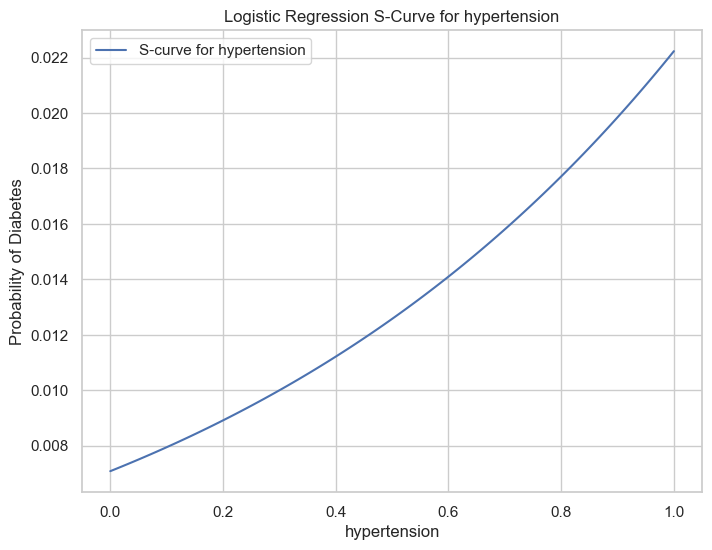

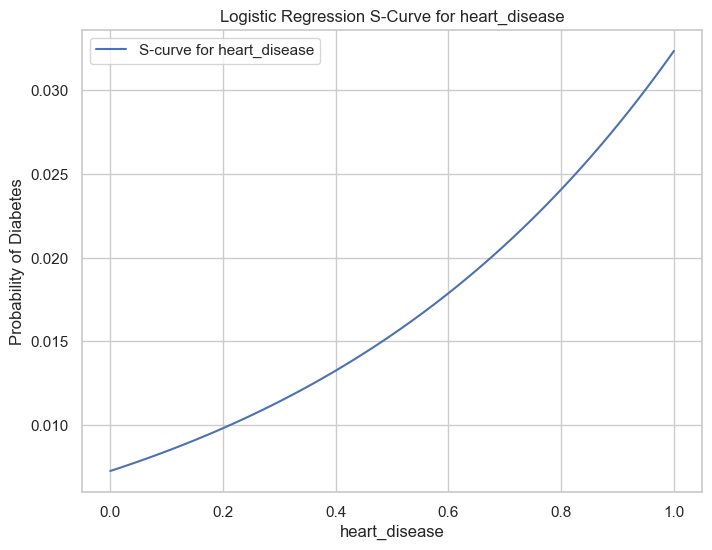

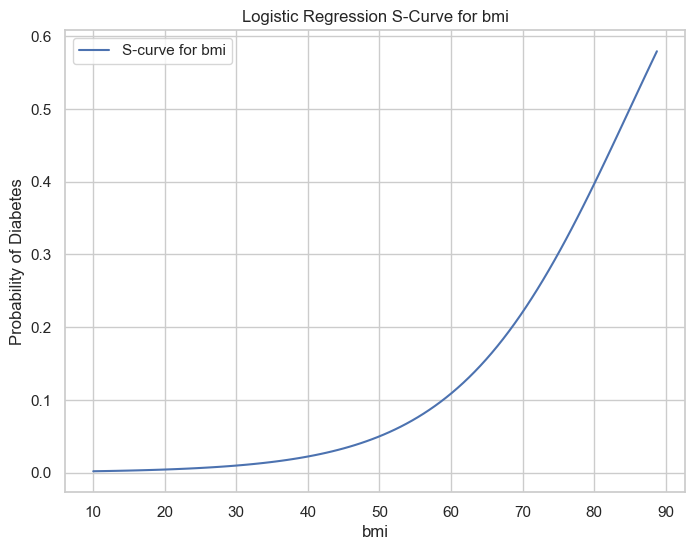

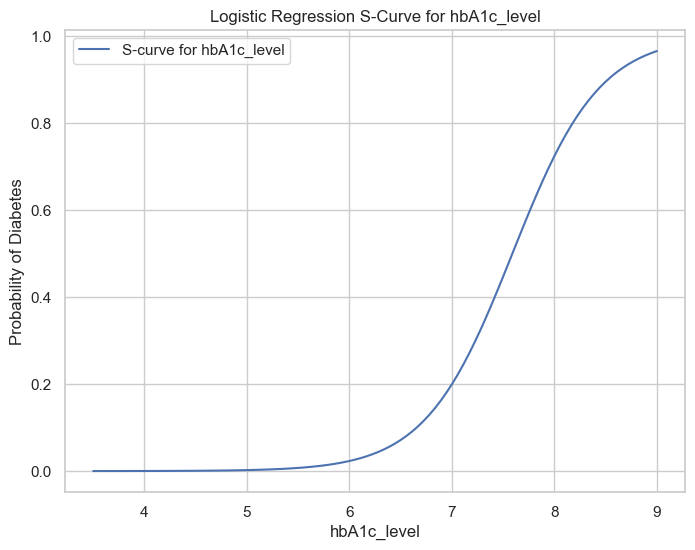

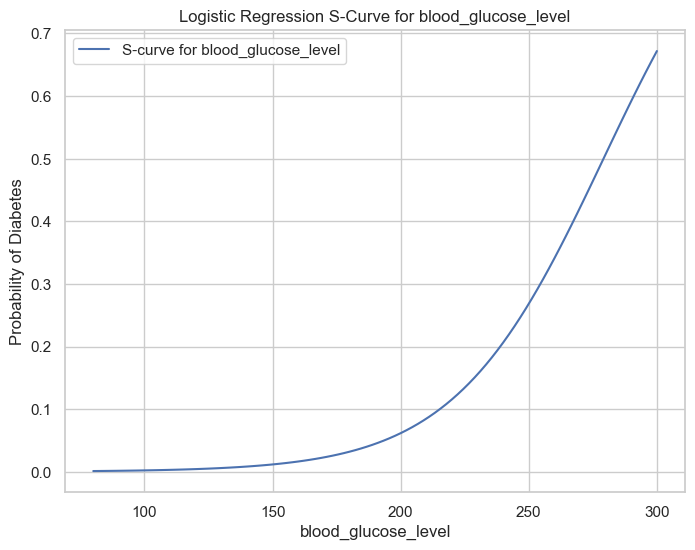

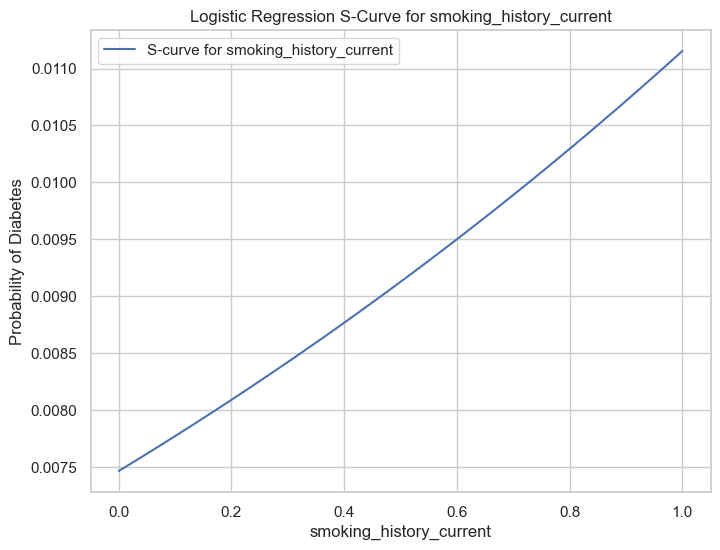

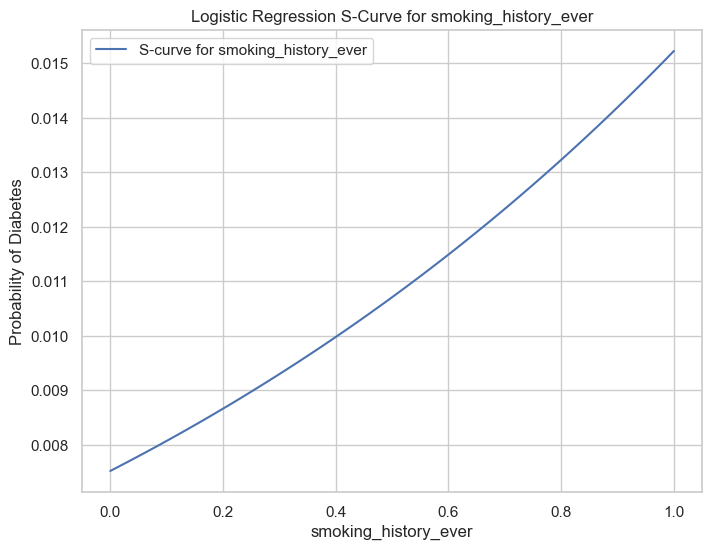

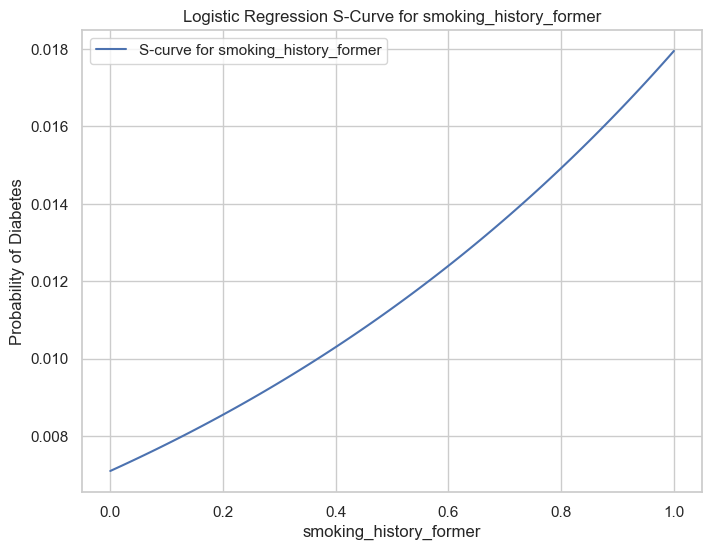

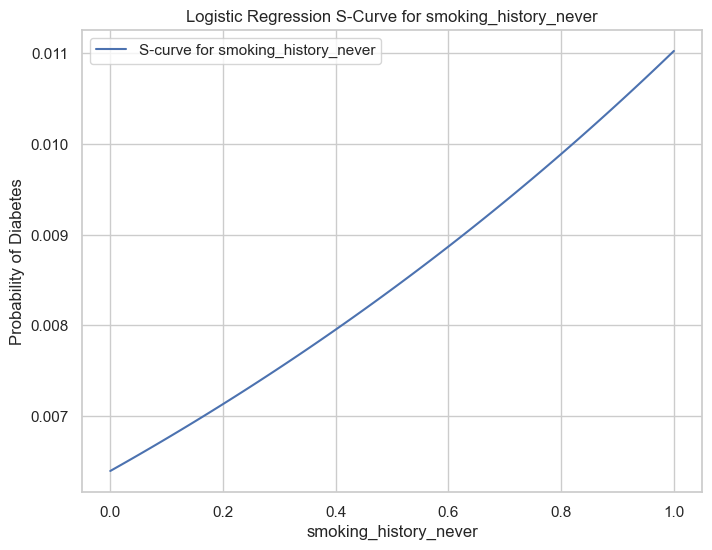

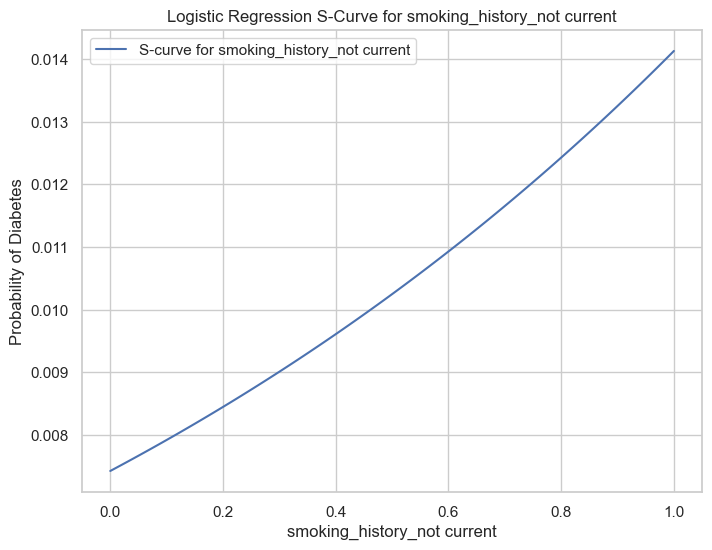

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Asian'] == 1]


y = df_african_american['diabetes']
X = df_african_american[['hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'smoking_history']]
X = pd.get_dummies(X, columns=['smoking_history'], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')


X = X.fillna(0)


X = sm.add_constant(X)

try:
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
except Exception as e:
    print(f"Error: {e}")


try:
    intercept = logit_model.params['const']
    coefficients = logit_model.params.drop('const').to_dict()

   
    for predictor in coefficients.keys():
        predictor_range = np.linspace(X[predictor].min(), X[predictor].max(), 100)
        X_scurve = pd.DataFrame({col: [X[col].mean()] * 100 for col in coefficients.keys()})
        X_scurve[predictor] = predictor_range
        X_scurve['const'] = 1
        X_scurve['Logit(p)'] = intercept + np.dot(X_scurve[coefficients.keys()], list(coefficients.values()))
        X_scurve['Probability (p)'] = 1 / (1 + np.exp(-X_scurve['Logit(p)']))

        # Plot the S-curve
        plt.figure(figsize=(8, 6))
        plt.plot(predictor_range, X_scurve['Probability (p)'], label=f'S-curve for {predictor}')
        plt.title(f'Logistic Regression S-Curve for {predictor}')
        plt.xlabel(predictor)
        plt.ylabel('Probability of Diabetes')
        plt.legend()
        plt.show()
except Exception as e:
    print(f"Error during S-curve generation: {e}")

#### 'race:Caucasian'

Optimization terminated successfully.
         Current function value: 0.125735
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                19876
Model:                          Logit   Df Residuals:                    19865
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5641
Time:                        19:53:44   Log-Likelihood:                -2499.1
converged:                       True   LL-Null:                       -5733.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -25.2265      0.599    -42.136      0.000  

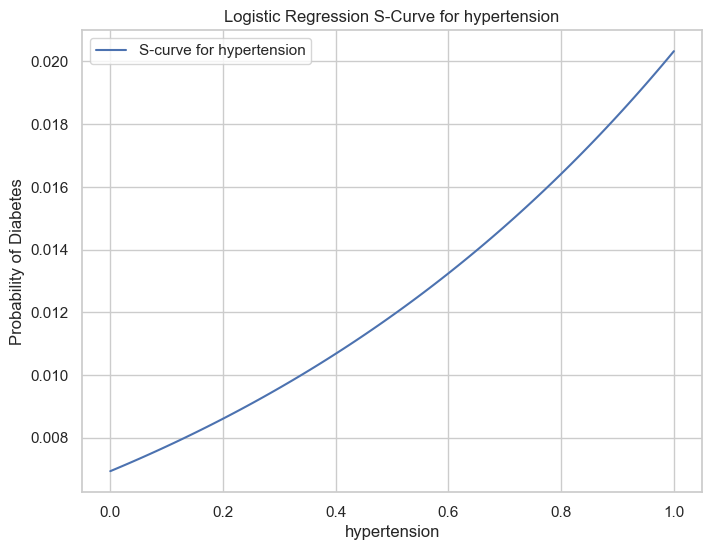

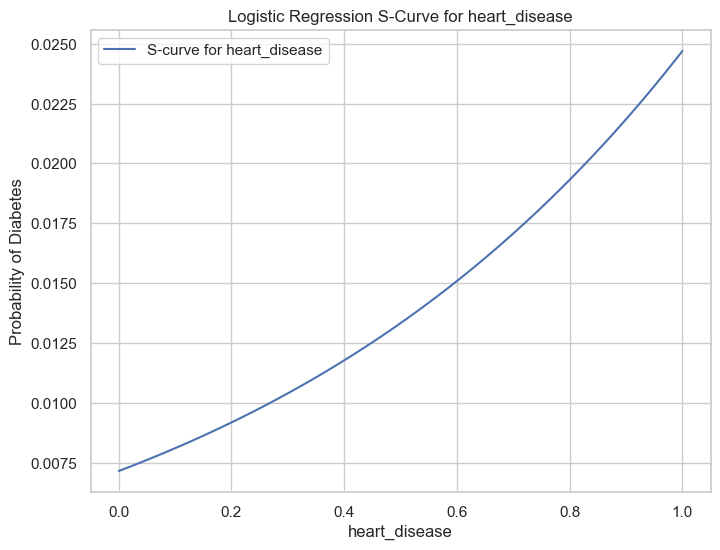

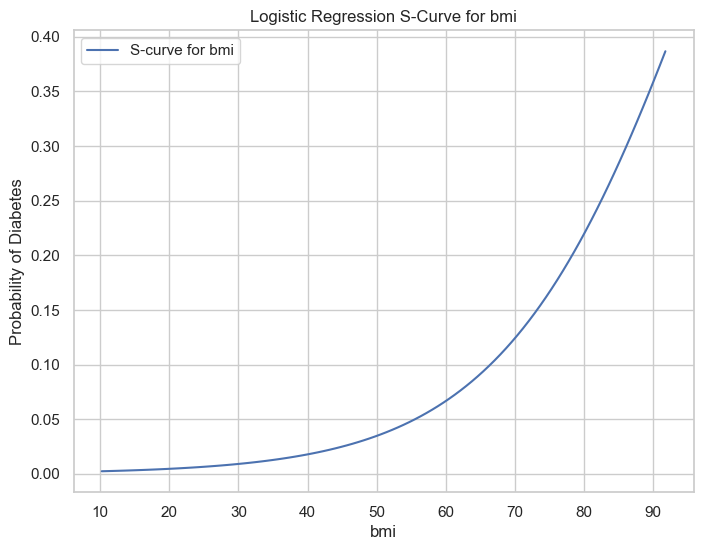

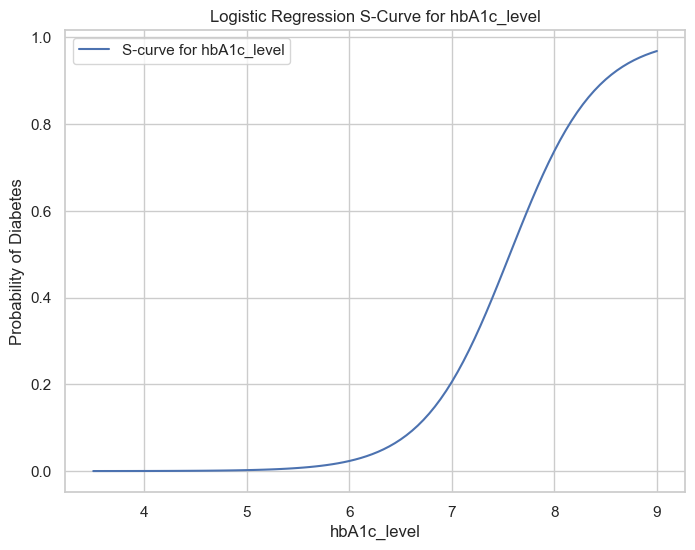

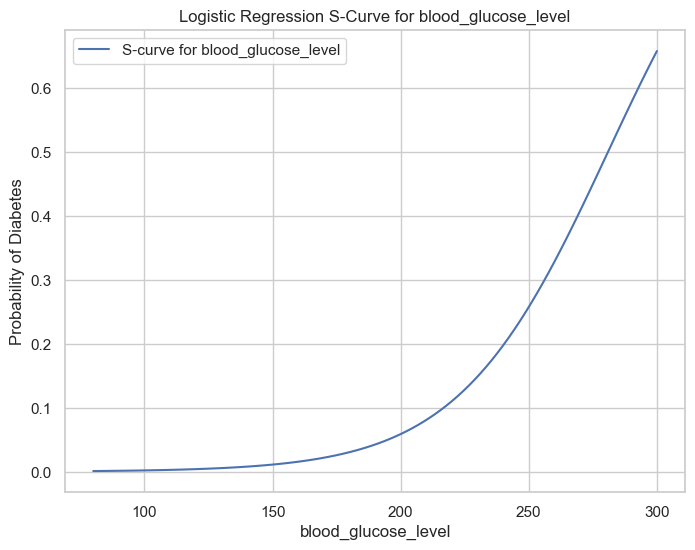

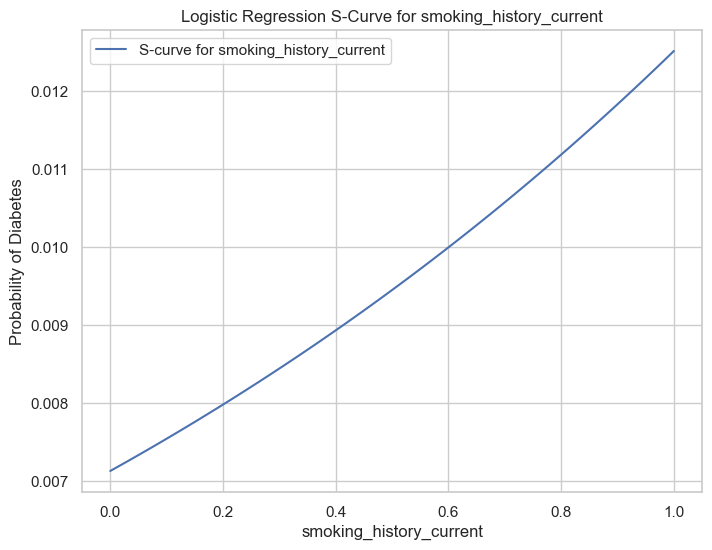

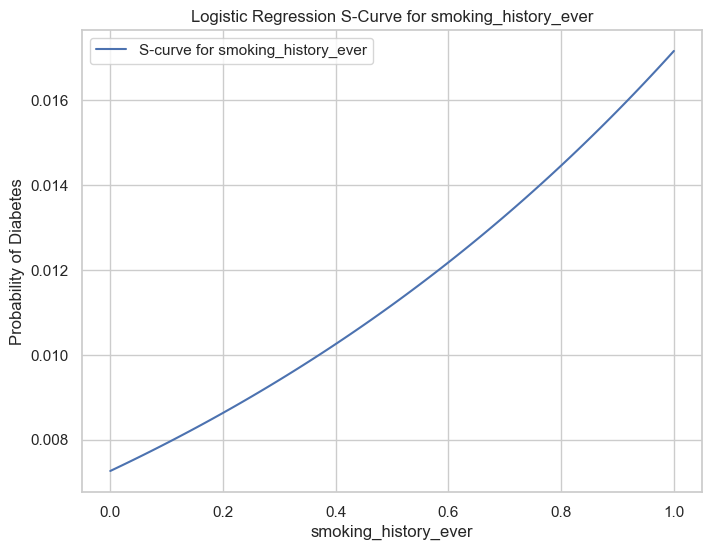

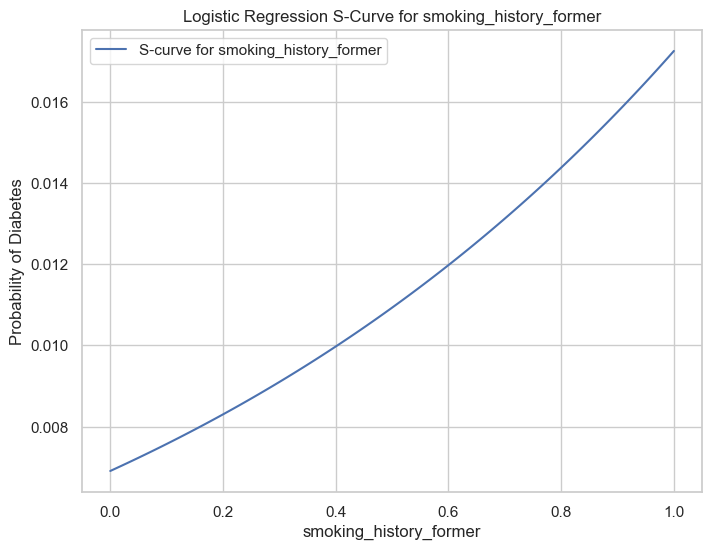

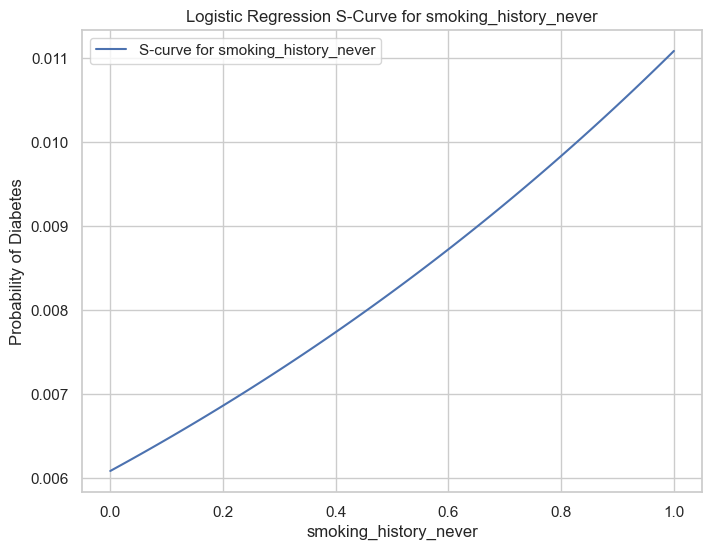

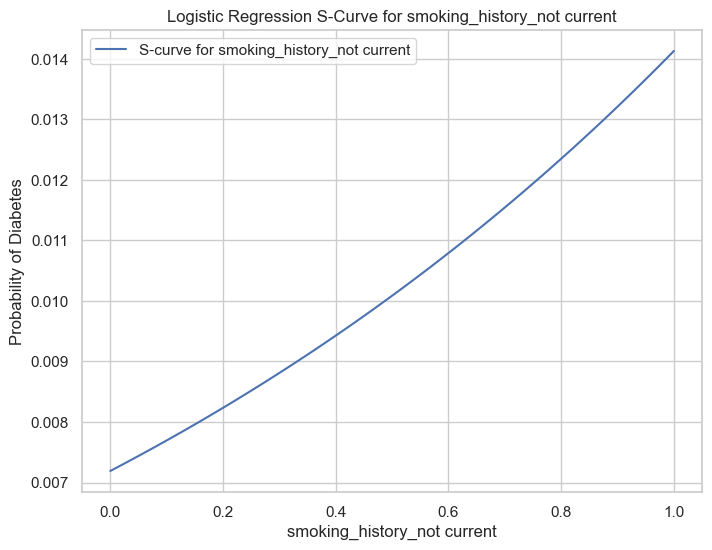

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Caucasian'] == 1]


y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'smoking_history']]


X = pd.get_dummies(X, columns=['smoking_history'], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)


X = sm.add_constant(X)


try:
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
except Exception as e:
    print(f"Error: {e}")


try:
    intercept = logit_model.params['const']
    coefficients = logit_model.params.drop('const').to_dict()

    # Generate S-curve for each predictor
    for predictor in coefficients.keys():
        predictor_range = np.linspace(X[predictor].min(), X[predictor].max(), 100)
        X_scurve = pd.DataFrame({col: [X[col].mean()] * 100 for col in coefficients.keys()})
        X_scurve[predictor] = predictor_range
        X_scurve['const'] = 1
        X_scurve['Logit(p)'] = intercept + np.dot(X_scurve[coefficients.keys()], list(coefficients.values()))
        X_scurve['Probability (p)'] = 1 / (1 + np.exp(-X_scurve['Logit(p)']))

        # Plot the S-curve
        plt.figure(figsize=(8, 6))
        plt.plot(predictor_range, X_scurve['Probability (p)'], label=f'S-curve for {predictor}')
        plt.title(f'Logistic Regression S-Curve for {predictor}')
        plt.xlabel(predictor)
        plt.ylabel('Probability of Diabetes')
        plt.legend()
        plt.show()
except Exception as e:
    print(f"Error during S-curve generation: {e}")

#### 'race:Hispanic'

Optimization terminated successfully.
         Current function value: 0.124263
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                19888
Model:                          Logit   Df Residuals:                    19877
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5701
Time:                        19:53:47   Log-Likelihood:                -2471.3
converged:                       True   LL-Null:                       -5749.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -25.2337      0.586    -43.062      0.000   

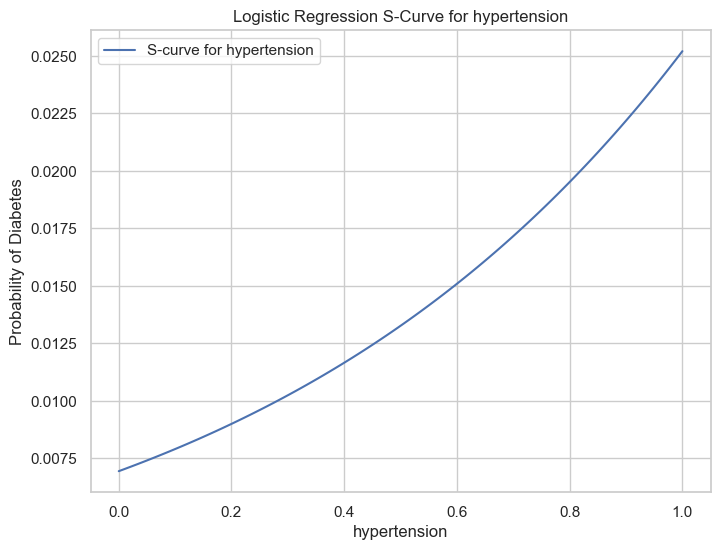

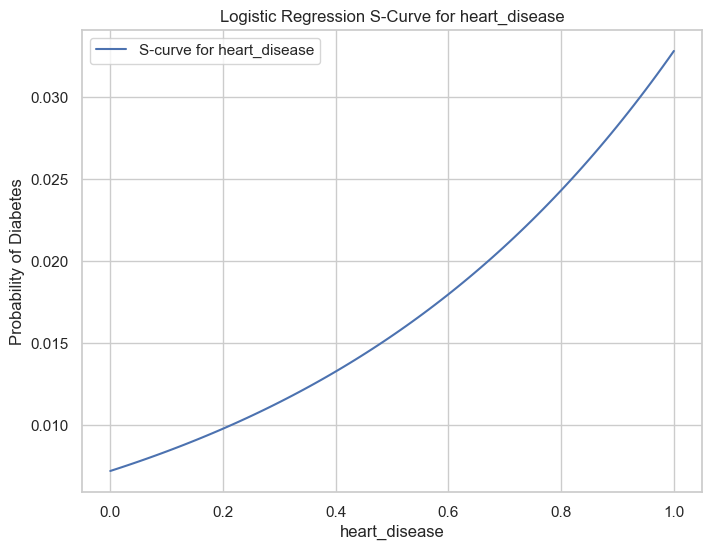

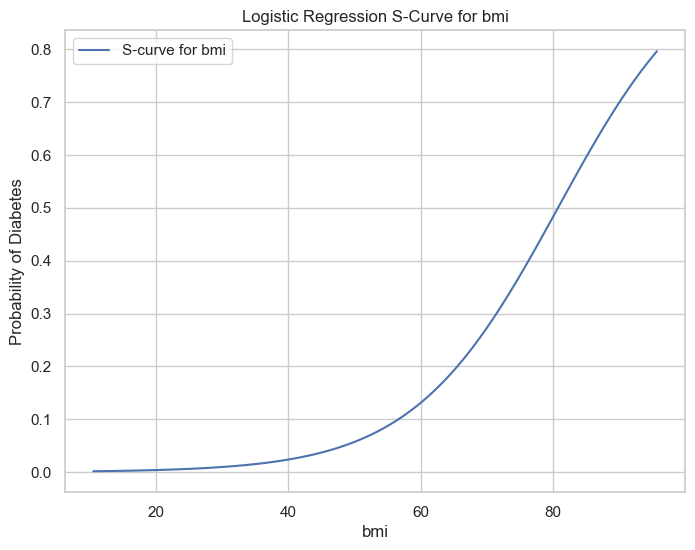

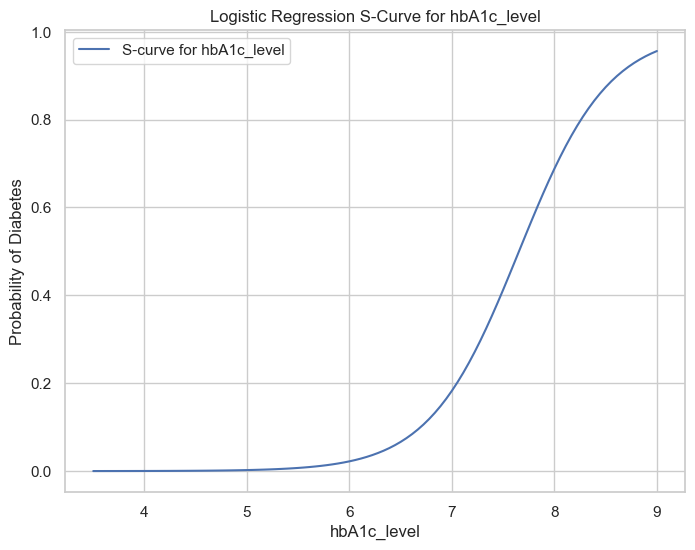

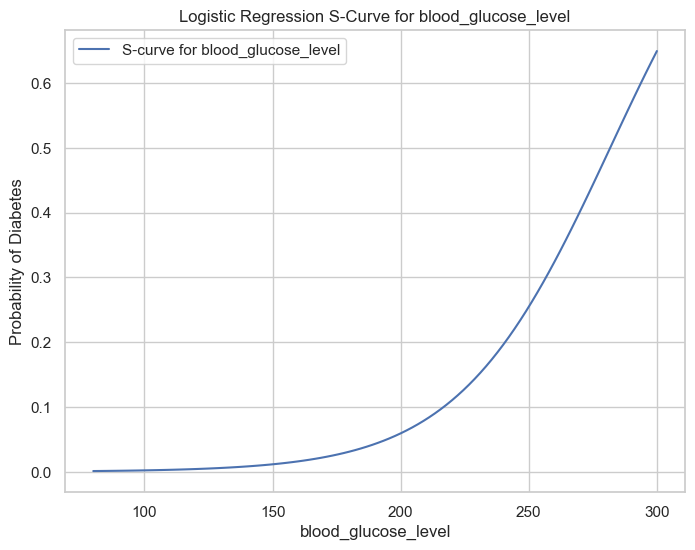

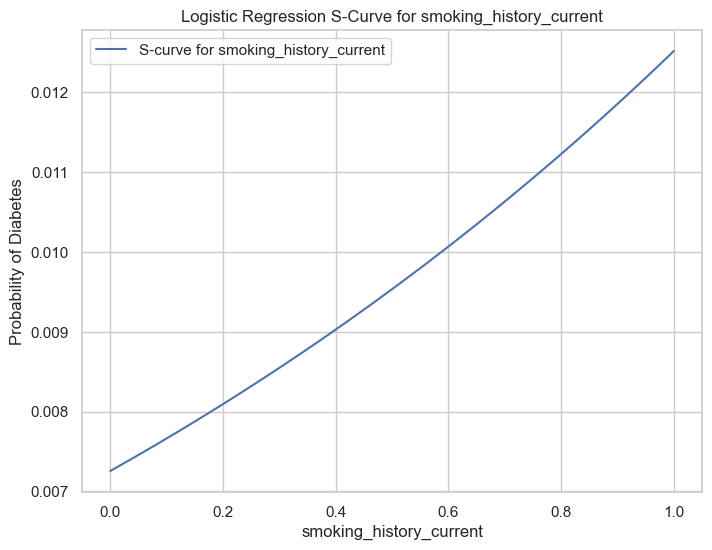

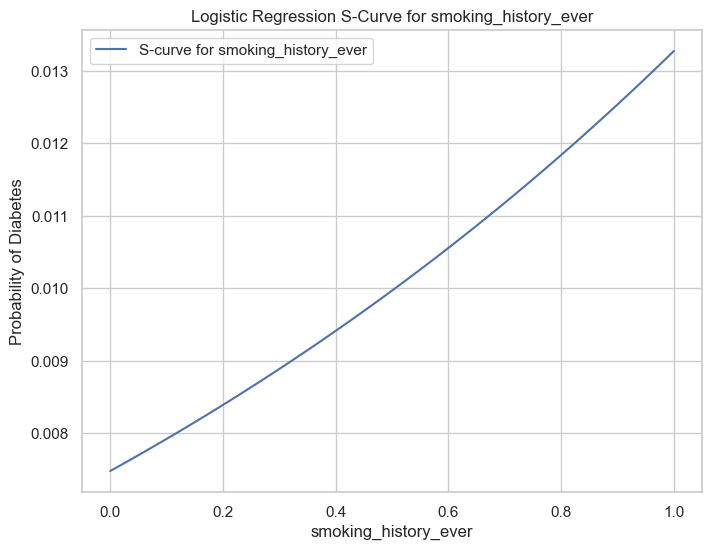

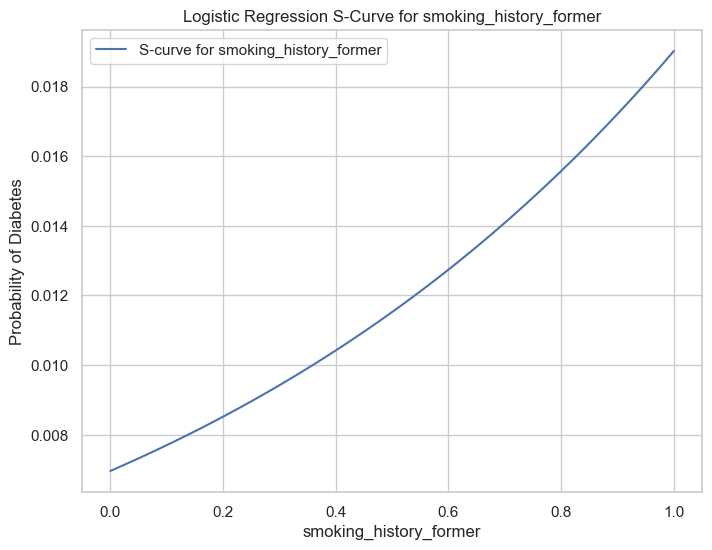

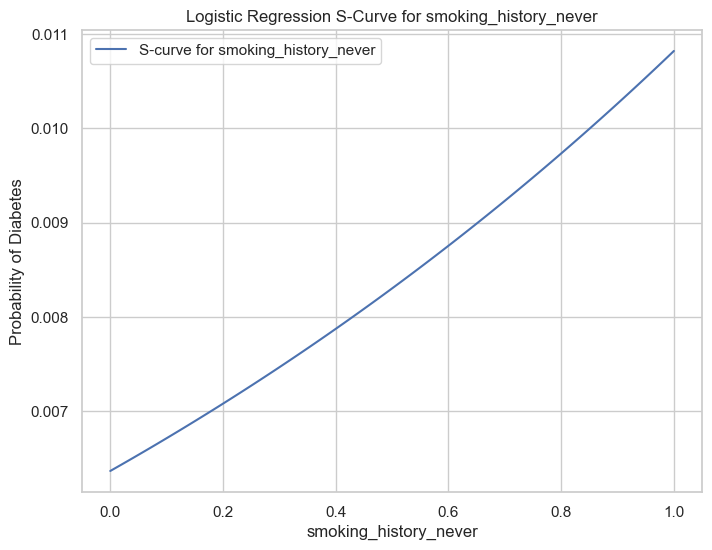

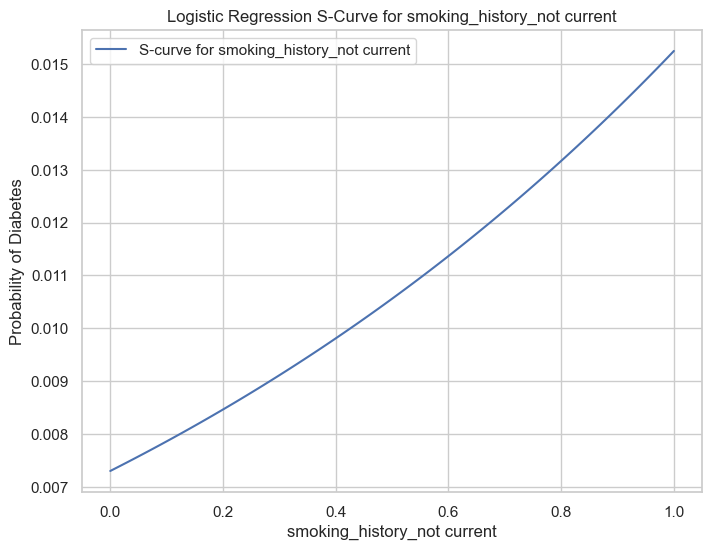

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Hispanic'] == 1]


y = df_african_american['diabetes']
X = df_african_american[['hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'smoking_history']]
X = pd.get_dummies(X, columns=['smoking_history'], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = sm.add_constant(X)

# Fit the logistic regression model
try:
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
except Exception as e:
    print(f"Error: {e}")


try:
    intercept = logit_model.params['const']
    coefficients = logit_model.params.drop('const').to_dict()

    # Generate S-curve for each predictor
    for predictor in coefficients.keys():
        predictor_range = np.linspace(X[predictor].min(), X[predictor].max(), 100)
        X_scurve = pd.DataFrame({col: [X[col].mean()] * 100 for col in coefficients.keys()})
        X_scurve[predictor] = predictor_range
        X_scurve['const'] = 1
        X_scurve['Logit(p)'] = intercept + np.dot(X_scurve[coefficients.keys()], list(coefficients.values()))
        X_scurve['Probability (p)'] = 1 / (1 + np.exp(-X_scurve['Logit(p)']))

        # Plot the S-curve
        plt.figure(figsize=(8, 6))
        plt.plot(predictor_range, X_scurve['Probability (p)'], label=f'S-curve for {predictor}')
        plt.title(f'Logistic Regression S-Curve for {predictor}')
        plt.xlabel(predictor)
        plt.ylabel('Probability of Diabetes')
        plt.legend()
        plt.show()
except Exception as e:
    print(f"Error during S-curve generation: {e}")

#### 'race:Other'

Optimization terminated successfully.
         Current function value: 0.113387
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                19998
Model:                          Logit   Df Residuals:                    19987
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.6008
Time:                        19:53:51   Log-Likelihood:                -2267.5
converged:                       True   LL-Null:                       -5679.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -26.9215      0.649    -41.472      0.000  

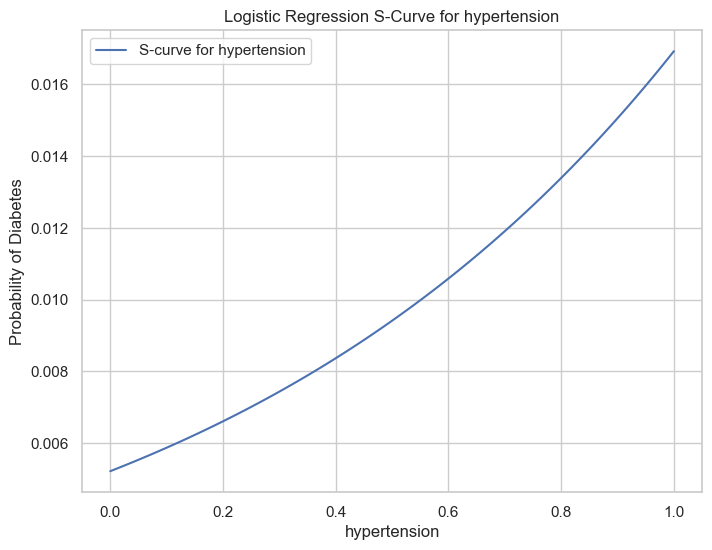

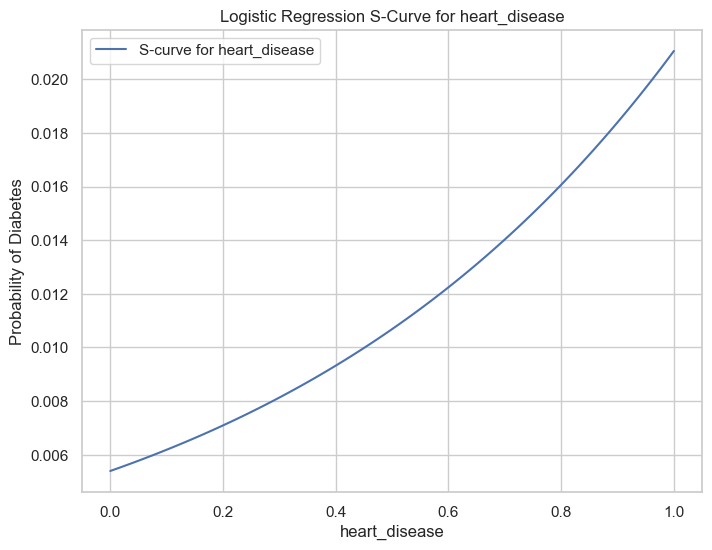

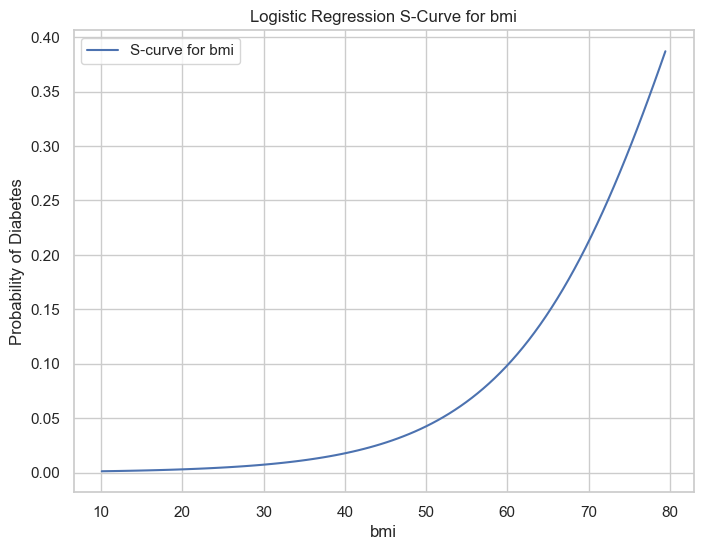

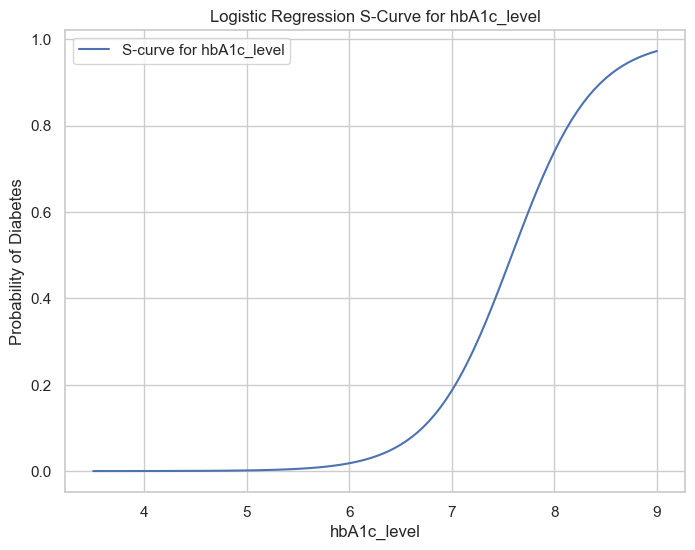

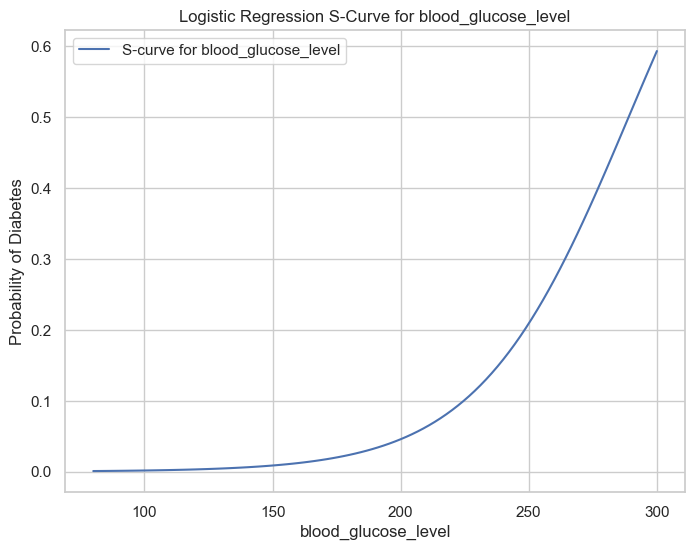

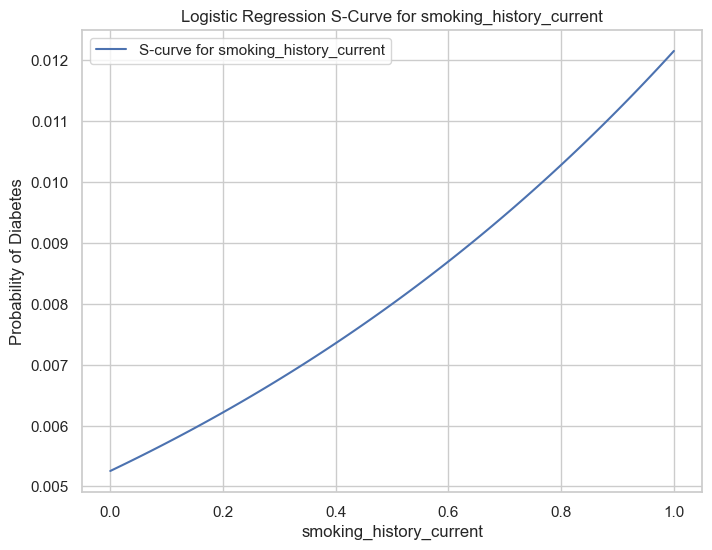

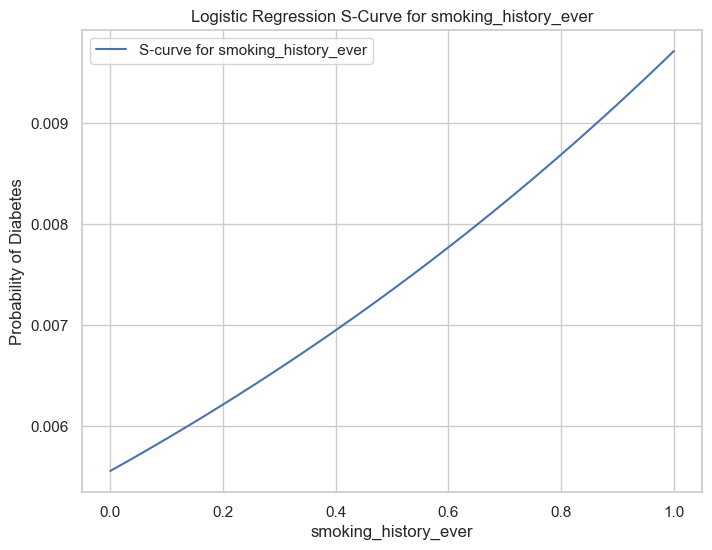

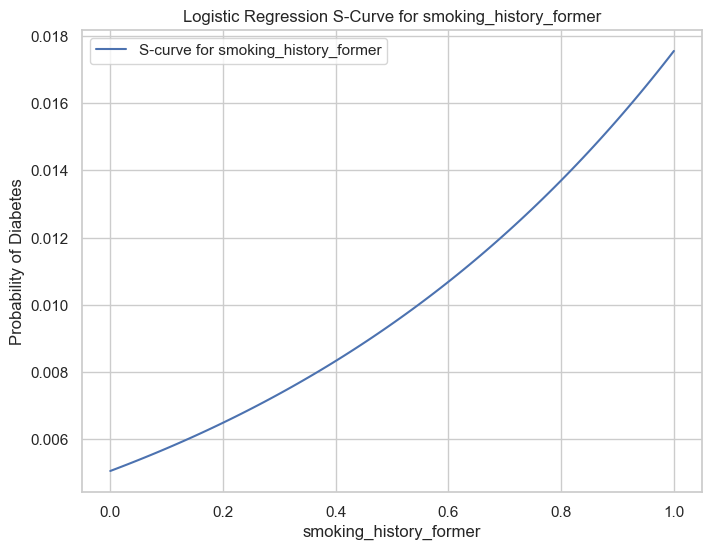

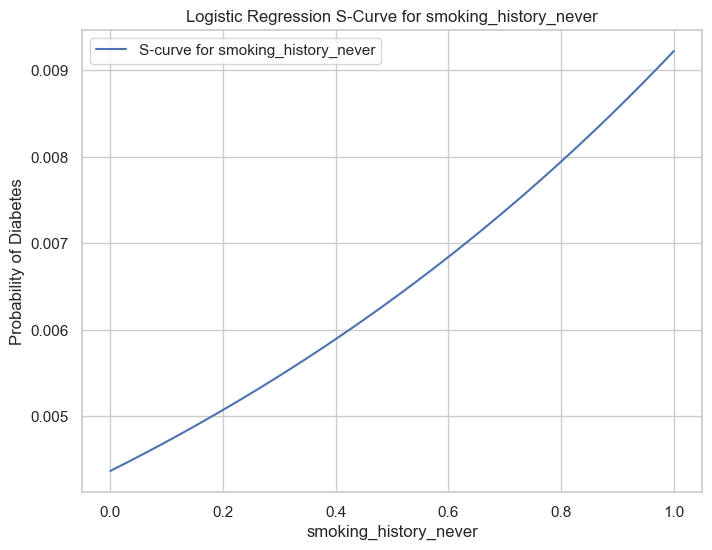

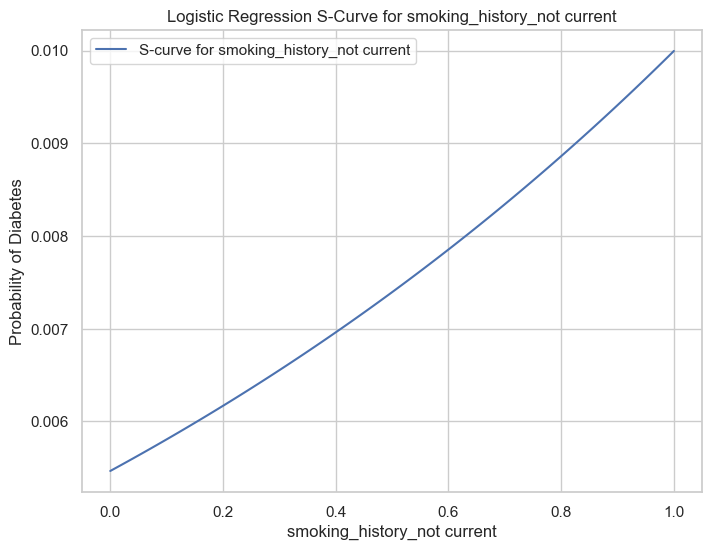

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Other'] == 1]


y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'smoking_history']]
X = pd.get_dummies(X, columns=['smoking_history'], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = sm.add_constant(X)


try:
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
except Exception as e:
    print(f"Error: {e}")

# Extract coefficients and intercept dynamically
try:
    intercept = logit_model.params['const']
    coefficients = logit_model.params.drop('const').to_dict()

    # Generate S-curve for each predictor
    for predictor in coefficients.keys():
        predictor_range = np.linspace(X[predictor].min(), X[predictor].max(), 100)
        X_scurve = pd.DataFrame({col: [X[col].mean()] * 100 for col in coefficients.keys()})
        X_scurve[predictor] = predictor_range
        X_scurve['const'] = 1
        X_scurve['Logit(p)'] = intercept + np.dot(X_scurve[coefficients.keys()], list(coefficients.values()))
        X_scurve['Probability (p)'] = 1 / (1 + np.exp(-X_scurve['Logit(p)']))

        # Plot the S-curve
        plt.figure(figsize=(8, 6))
        plt.plot(predictor_range, X_scurve['Probability (p)'], label=f'S-curve for {predictor}')
        plt.title(f'Logistic Regression S-Curve for {predictor}')
        plt.xlabel(predictor)
        plt.ylabel('Probability of Diabetes')
        plt.legend()
        plt.show()
except Exception as e:
    print(f"Error during S-curve generation: {e}")

In [25]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:AfricanAmerican'] == 1]


y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level']]

X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
y = y.loc[X.index]
X = sm.add_constant(X)


try:
    logit_model = sm.Logit(y, X).fit()
    # Print the summary of the logistic regression
    print(logit_model.summary())
    
   
    y_pred_prob = logit_model.predict(X)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    # Print results
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    
except Exception as e:
    print(f"Error: {e}")


Optimization terminated successfully.
         Current function value: 0.134693
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                20223
Model:                          Logit   Df Residuals:                    20212
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5458
Time:                        19:53:55   Log-Likelihood:                -2723.9
converged:                       True   LL-Null:                       -5996.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -22.2877      0.479    -46.537      0.000   

In [26]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Asian'] == 1]


y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level']]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
y = y.loc[X.index]


X = sm.add_constant(X)

# Fit the logistic regression model
try:
    logit_model = sm.Logit(y, X).fit()

    print(logit_model.summary())
    
    
    y_pred_prob = logit_model.predict(X)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    
  
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    # Print results
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    
except Exception as e:
    print(f"Error: {e}")


Optimization terminated successfully.
         Current function value: 0.130810
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                20015
Model:                          Logit   Df Residuals:                    20004
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5577
Time:                        19:53:55   Log-Likelihood:                -2618.2
converged:                       True   LL-Null:                       -5919.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -22.3723      0.494    -45.266      0.000   

In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Caucasian'] == 1]


y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level']]


X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
y = y.loc[X.index]
X = sm.add_constant(X)


try:
    logit_model = sm.Logit(y, X).fit()
   
    print(logit_model.summary())
    
  
    y_pred_prob = logit_model.predict(X)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    # Print results
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    
except Exception as e:
    print(f"Error: {e}")

Optimization terminated successfully.
         Current function value: 0.133431
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                19876
Model:                          Logit   Df Residuals:                    19865
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5375
Time:                        19:53:55   Log-Likelihood:                -2652.1
converged:                       True   LL-Null:                       -5733.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -21.8708      0.490    -44.609      0.000   

In [28]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


df_african_american = df[df['race:Hispanic'] == 1]


y = df_african_american['diabetes']


X = df_african_american[['hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level']]

X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
y = y.loc[X.index]
X = sm.add_constant(X)


try:
    logit_model = sm.Logit(y, X).fit()
 
    print(logit_model.summary())
    

    y_pred_prob = logit_model.predict(X)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    
   
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    # Print results
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    
except Exception as e:
    print(f"Error: {e}")


Optimization terminated successfully.
         Current function value: 0.129833
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                19888
Model:                          Logit   Df Residuals:                    19877
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5509
Time:                        19:53:55   Log-Likelihood:                -2582.1
converged:                       True   LL-Null:                       -5749.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -22.5589      0.500    -45.113      0.000   

### Results Summary

### **African American**
#### Model Fit
- **Log-Likelihood**: -2723.9 (improved from null: -5996.9), indicating the predictors meaningfully explain the variance in diabetes.
- **Pseudo R-squared**: 0.5458 (54.58% variability explained).
- **Converged**: Yes.

#### Key Predictors
- **HbA1c Level**: Strongest predictor, with a coefficient of 1.9608 (p < 0.001). Each unit increase in HbA1c increases the log-odds of diabetes significantly.
- **Blood Glucose Level**: Significant predictor (coefficient: 0.0337), meaning higher glucose levels are strongly associated with diabetes.
- **Smoking History**:
  - Current, former, or never smoking statuses have positive associations with diabetes, but current smokers have the strongest association.

#### Model Performance
- **Sensitivity (True Positive Rate)**: 1033/(1033+735)= ~58.4%.
- **Specificity (True Negative Rate)**: 18321/(18321+134)= ~99.3%.

---

### **Asian**
#### Model Fit
- **Log-Likelihood**: -2618.2 (improved from null: -5919.2).
- **Pseudo R-squared**: 0.5577, indicating slightly better explanatory power compared to the African American model.
- **Converged**: Yes.

#### Key Predictors
- Similar to African Americans, HbA1c level (coefficient: 1.9856) and blood glucose level (coefficient: 0.0344) are the strongest predictors.
- **Smoking History**:
  - Smokers (current or former) show weaker associations compared to African Americans but remain significant.

#### Model Performance
- **Sensitivity**: 1035/(1035+708) = ~59.4%.
- **Specificity**: 18131/(18131+141) = ~99.2%.

---

### **Caucasian**
#### Model Fit
- **Log-Likelihood**: -2652.1, with R-squared 0.5375, indicating slightly weaker fit compared to Asians and African Americans.

#### Key Predictors
- **HbA1c Level**: Coefficient = 1.9712 (p < 0.001) remains strongest predictor.
- **Blood Glucose Level**: Coefficient = 0.0342 (p < 0.001).
- **Heart Disease**: Coefficient = 1.2365; weaker association compared to other groups.

#### Model Performance
- **Sensitivity**: 954/(954+716) = ~57.1%.
- **Specificity**: 18082/(18082+124) = ~99.3%.

---

### **Hispanic**
#### Model Fit
- **Log-Likelihood**: -2582.1, with a pseudo R-squared of 0.5509, making it one of the best-fitting models.

#### Key Predictors
- **HbA1c Level** (coefficient: 1.9896) and **Blood Glucose Level** (coefficient: 0.0342) remain the strongest.
- **Hypertension**: Coefficient = 1.3124; stronger association than in other racial groups.

#### Model Performance
- **Sensitivity**: 979/(979+697) = ~58.4%.
- **Specificity**: 18053/(18053+159) = ~99.1%.

---

### **Key Insights Across Races**
1. **Consistent Predictors**:
   - HbA1c level and blood glucose level are the strongest predictors of diabetes across all racial groups.
   - Hypertension and heart disease are also significant, with varying strengths.

2. **Smoking History**:
    - Current smokers show higher log-odds of diabetes compared to former smokers or those who never smoked. However, the strength of this association varies across groups.

3. **Model Performance**:
   - Specificity (True Negative Rate): Very high across all groups (~99%).
   - Sensitivity (True Positive Rate): Ranges from 57% to 59%, showing room for improvement in detecting diabetes cases.

4. **Racial Variability**:
   - **Hispanic**: Strongest association between hypertension and diabetes.
   - **Asian**: Slightly better model fit (highest pseudo R-squared).

In [29]:
# Chi-Square Test: To evaluate the dependency of diabetes on race and gender.
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = 'diabetes_dataset.csv'
df = pd.read_csv(file_path)


race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']


def create_contingency_table_by_gender(gender_value):
    contingency_table = []
    for race in race_columns:
       
        diabetic_count = df[(df[race] == 1) & (df['gender'] == gender_value) & (df['diabetes'] == 1)].shape[0]
        non_diabetic_count = df[(df[race] == 1) & (df['gender'] == gender_value) & (df['diabetes'] == 0)].shape[0]
        contingency_table.append([diabetic_count, non_diabetic_count])
    return pd.DataFrame(contingency_table, index=race_columns, columns=['Diabetes = 1', 'Diabetes = 0'])


for gender in ['Male', 'Female']:
    print(f"\nChi-Square Test for Gender: {gender}")

    
    contingency_df = create_contingency_table_by_gender(gender)
    print("Observed Frequencies Table:")
    print(contingency_df)

   
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_df)

    
    print("\nExpected Frequencies Table:")
    print(pd.DataFrame(expected, index=race_columns, columns=['Diabetes = 1', 'Diabetes = 0']))

   
    print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")

   
    alpha = 0.05  # significance level
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis - Diabetes status is dependent on race for {gender}.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis - Diabetes status is independent of race for {gender}.")



Chi-Square Test for Gender: Male
Observed Frequencies Table:
                      Diabetes = 1  Diabetes = 0
race:AfricanAmerican           838          7576
race:Asian                     862          7435
race:Caucasian                 783          7361
race:Hispanic                  793          7491
race:Other                     763          7528

Expected Frequencies Table:
                      Diabetes = 1  Diabetes = 0
race:AfricanAmerican    820.278687   7593.721313
race:Asian              808.872387   7488.127613
race:Caucasian          793.956457   7350.043543
race:Hispanic           807.605021   7476.394979
race:Other              808.287449   7482.712551

Chi-Square Statistic: 7.5623
P-value: 0.1090
Degrees of Freedom: 4
Conclusion: Fail to reject the null hypothesis - Diabetes status is independent of race for Male.

Chi-Square Test for Gender: Female
Observed Frequencies Table:
                      Diabetes = 1  Diabetes = 0
race:AfricanAmerican           930        

### 5.Time Trend Analysis

- Overall Population Trend over time analysis from 2015-2022
- Overall Population with Diabetes Trend over time analysis from 2015-2022
- Plot trends for age, hypertension, heart disease, smoking history, hbA1c and BMI categories.


In [30]:
df = pd.read_csv("diabetes_dataset.csv")


In [31]:
def rename_last_column (p_df, p_column_name):
 
    return  [*p_df.columns[:-1],p_column_name]

In [32]:
def toggle_data(p_data):
    try:
        if p_data == 0:
            return "No"
        elif p_data == 1:
            return "Yes"
        else:
            raise ValueError(f"Unknown value: {p_data}")
    except ValueError as e:
        print(f"(ERROR) {e}")
        return "unknown"

In [33]:
df["group_diabetes"] =   df.apply(lambda x:  toggle_data(x["diabetes"]), axis = 1)
df["group_age"] =   df.apply(lambda x:  bin_age(x["age"]), axis = 1)
df["group_bmi"] =   df.apply(lambda x:  bin_bmi(x["bmi"]), axis = 1)
df["group_hbA1c"] = df.apply(lambda x:  bin_hemoglobin(x["hbA1c_level"]), axis = 1)
df["group_hypertension"] =   df.apply(lambda x:  toggle_data(x["hypertension"]), axis = 1)
df["group_heart_disease"] =   df.apply(lambda x:  toggle_data(x["heart_disease"]), axis = 1)

In [34]:
df.head(5)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,...,bmi,hbA1c_level,blood_glucose_level,diabetes,group_diabetes,group_age,group_bmi,group_hbA1c,group_hypertension,group_heart_disease
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,...,27.32,5.0,100,0,No,18-44,overweight,normal,No,No
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,...,19.95,5.0,90,0,No,18-44,healthy_weight,normal,No,No
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,...,23.76,4.8,160,0,No,18-44,healthy_weight,normal,No,No
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,...,27.32,4.0,159,0,No,18-44,overweight,normal,No,No
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,...,23.75,6.5,90,0,No,45-64,healthy_weight,diabetes,No,No


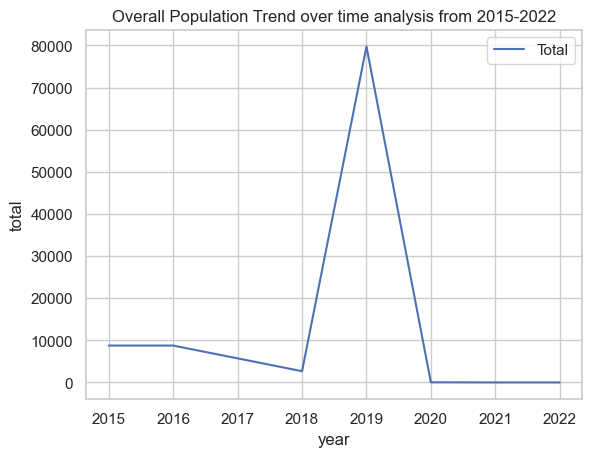

In [35]:
population_total = df.groupby(["year"]).size()
df_population_total = pd.DataFrame(population_total)
df_population_total.reset_index(inplace=True)
df_population_total.columns = rename_last_column(df_population_total,"total")

sns.lineplot(data=df_population_total, x="year", y="total")
plt.title("Overall Population Trend over time analysis from 2015-2022")
plt.legend(labels=["Total"])

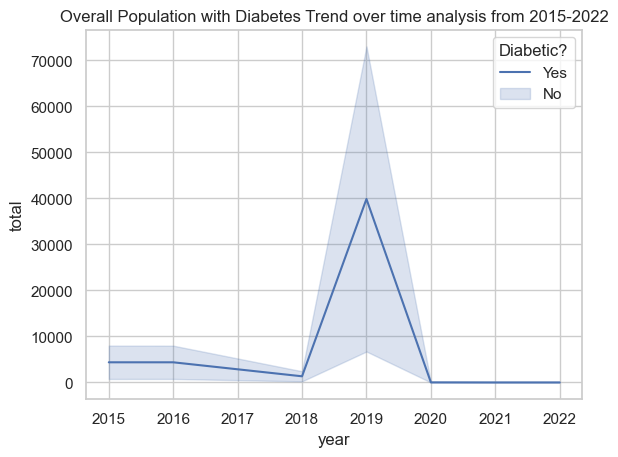

In [36]:
population_diabetes = df.groupby(["year","group_diabetes"]).size()
df_population_diabetes = pd.DataFrame(population_diabetes)
df_population_diabetes.reset_index(inplace=True)
df_population_diabetes.columns = rename_last_column(df_population_diabetes,"total")

sns.lineplot(data=df_population_diabetes, x="year", y="total")
plt.title("Overall Population with Diabetes Trend over time analysis from 2015-2022")
plt.legend(labels=["Yes","No"],title="Diabetic?")


In [37]:
'''
Population total headcount size per year based on State of health:
	 
'''
# population of diabetics

population_groups = ["year","group_diabetes","diabetes","group_age","group_bmi","group_hypertension","group_heart_disease","smoking_history","group_hbA1c" ]

df_diabetes_groups = df[population_groups].copy()
df_diabetes_groups.head(5)    

,year,group_diabetes,diabetes,group_age,group_bmi,group_hypertension,group_heart_disease,smoking_history,group_hbA1c
0,2020,No,0,18-44,overweight,No,No,never,normal
1,2015,No,0,18-44,healthy_weight,No,No,never,normal
2,2015,No,0,18-44,healthy_weight,No,No,never,normal
3,2015,No,0,18-44,overweight,No,No,never,normal
4,2016,No,0,45-64,healthy_weight,No,No,never,diabetes


In [38]:
df_group1 = df_diabetes_groups[["year","diabetes","group_age"]].copy()
population_diabetes_groups = df_group1.groupby(["year","diabetes","group_age"]).size()
df_population_diabetes_group = pd.DataFrame(population_diabetes_groups)
df_population_diabetes_group.reset_index(inplace=True)
df_population_diabetes_group = df_population_diabetes_group.loc[df_population_diabetes_group["diabetes"]==1]
df_population_diabetes_group.head(5)

,year,diabetes,group_age,0
4,2015,1,18-44,91
5,2015,1,45-64,294
6,2015,1,Over 65,371
7,2015,1,Under 18,3
12,2016,1,18-44,102


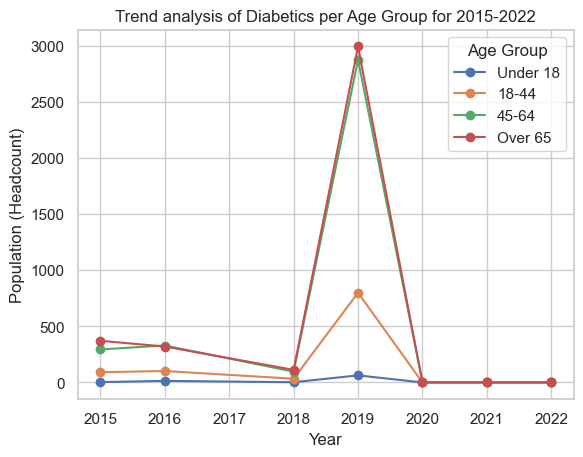

In [39]:
df_population_diabetes_group.columns = rename_last_column(df_population_diabetes_group,"total")
df_population_diabetes_group["group_age"] = pd.Categorical(
    df_population_diabetes_group["group_age"],
    categories=age_group_order,
    ordered=True
)

plot_frame = df_population_diabetes_group.pivot_table(values="total",
                   aggfunc="sum", 
                   index=df_population_diabetes_group["year"], 
                   columns=df_population_diabetes_group["group_age"] 
                  )

plot_frame.columns.name = "Age Group"
plot_group = plot_frame.plot(style="-o",
            title="Trend analysis of Diabetics per Age Group for 2015-2022")
plot_group.set_ylabel("Population (Headcount)")
plot_group.set_xlabel("Year")
tmp = plot_group.plot()
df_population_diabetes_group.to_csv('test_total_diabetes_group.csv')


In [40]:

df_group2 = df_diabetes_groups[["year","diabetes","group_bmi"]].copy()
population_diabetes_groups = df_group2.groupby(["year","diabetes","group_bmi"]).size()

df_population_diabetes_group = pd.DataFrame(population_diabetes_groups)
df_population_diabetes_group.reset_index(inplace=True)
df_population_diabetes_group = df_population_diabetes_group.loc[df_population_diabetes_group["diabetes"]==1]
df_population_diabetes_group.head(5)



,year,diabetes,group_bmi,0
4,2015,1,healthy_weight,81
5,2015,1,obesity,364
6,2015,1,overweight,312
7,2015,1,underweight,2
12,2016,1,healthy_weight,82


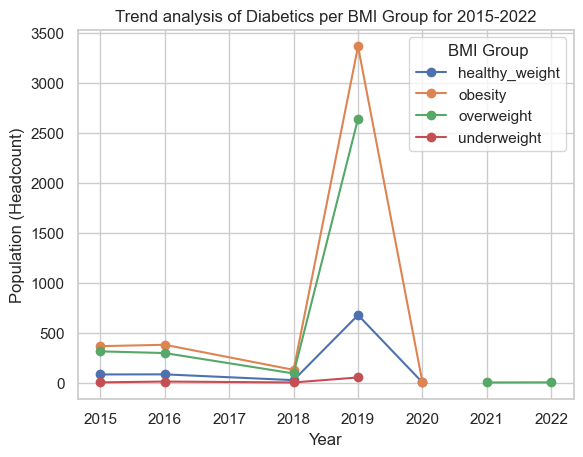

In [41]:
df_population_diabetes_group.columns = rename_last_column(df_population_diabetes_group,"total")


plot_frame = df_population_diabetes_group.pivot_table(values="total",
                   aggfunc="sum", 
                   index=df_population_diabetes_group["year"], 
                   columns=df_population_diabetes_group["group_bmi"] 
                  )

plot_frame.columns.name = "BMI Group"
plot_group = plot_frame.plot(style="-o",
            title="Trend analysis of Diabetics per BMI Group for 2015-2022")
plot_group.set_ylabel("Population (Headcount)")
plot_group.set_xlabel("Year")
tmp = plot_group.plot()

In [42]:

df_group3 = df_diabetes_groups[["year","diabetes","group_hypertension"]].copy()
population_diabetes_groups = df_group3.groupby(["year","diabetes","group_hypertension"]).size()

df_population_diabetes_group = pd.DataFrame(population_diabetes_groups)
df_population_diabetes_group.reset_index(inplace=True)
# df_population_diabetes_group = df_population_diabetes_group.loc[df_population_diabetes_group["diabetes"]==1]
df_population_diabetes_group.head(5)




,year,diabetes,group_hypertension,0
0,2015,0,No,7526
1,2015,0,Yes,475
2,2015,1,No,583
3,2015,1,Yes,176
4,2016,0,No,7482


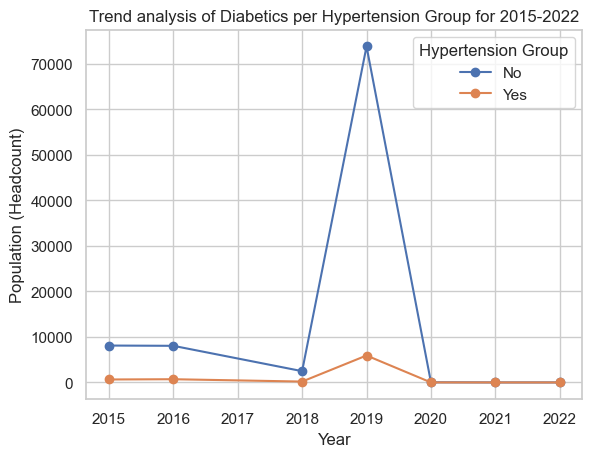

In [43]:
df_population_diabetes_group.columns = rename_last_column(df_population_diabetes_group,"total")


plot_frame = df_population_diabetes_group.pivot_table(values="total",
                   aggfunc="sum", 
                   index=df_population_diabetes_group["year"], 
                   columns=df_population_diabetes_group["group_hypertension"] 
                  )

plot_frame.columns.name = "Hypertension Group"
plot_group = plot_frame.plot(style="-o",
            title="Trend analysis of Diabetics per Hypertension Group for 2015-2022")
plot_group.set_ylabel("Population (Headcount)")
plot_group.set_xlabel("Year")
tmp = plot_group.plot()

In [44]:

df_group4 = df_diabetes_groups[["year","diabetes","group_heart_disease"]].copy()
population_diabetes_groups = df_group4.groupby(["year","diabetes","group_heart_disease"]).size()

df_population_diabetes_group = pd.DataFrame(population_diabetes_groups)
df_population_diabetes_group.reset_index(inplace=True)
# df_population_diabetes_group = df_population_diabetes_group.loc[df_population_diabetes_group["diabetes"]==1]
df_population_diabetes_group.head(5)




,year,diabetes,group_heart_disease,0
0,2015,0,No,7773
1,2015,0,Yes,228
2,2015,1,No,646
3,2015,1,Yes,113
4,2016,0,No,7762


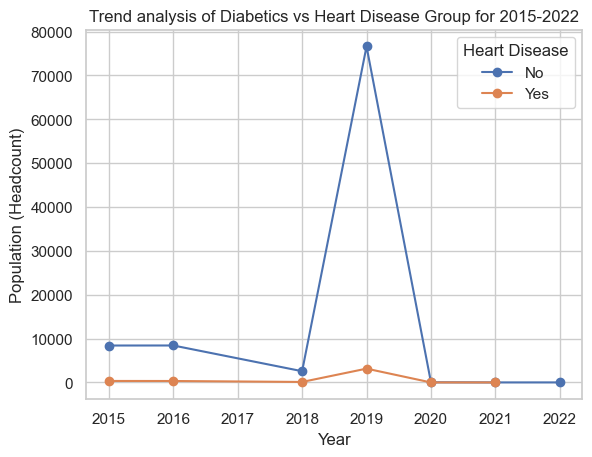

In [45]:
df_population_diabetes_group.columns = rename_last_column(df_population_diabetes_group,"total")


plot_frame = df_population_diabetes_group.pivot_table(values="total",
                   aggfunc="sum", 
                   index=df_population_diabetes_group["year"], 
                   columns=df_population_diabetes_group["group_heart_disease"] 
                  )

plot_frame.columns.name = "Heart Disease"
plot_group = plot_frame.plot(style="-o",
            title="Trend analysis of Diabetics vs Heart Disease Group for 2015-2022")
plot_group.set_ylabel("Population (Headcount)")
plot_group.set_xlabel("Year")
tmp = plot_group.plot()

In [46]:

df_group5 = df_diabetes_groups[["year","diabetes","smoking_history"]].copy()
population_diabetes_groups = df_group5.groupby(["year","diabetes","smoking_history"]).size()

df_population_diabetes_group = pd.DataFrame(population_diabetes_groups)
df_population_diabetes_group.reset_index(inplace=True)
df_population_diabetes_group = df_population_diabetes_group.loc[df_population_diabetes_group["diabetes"]==1]
df_population_diabetes_group.head(5)



,year,diabetes,smoking_history,0
6,2015,1,No Info,125
7,2015,1,current,77
8,2015,1,ever,44
9,2015,1,former,138
10,2015,1,never,299


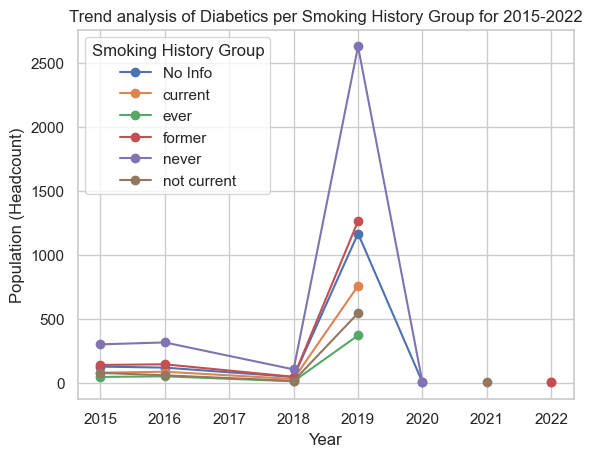

In [47]:
df_population_diabetes_group.columns = rename_last_column(df_population_diabetes_group,"total")


plot_frame = df_population_diabetes_group.pivot_table(values="total",
                   aggfunc="sum", 
                   index=df_population_diabetes_group["year"], 
                   columns=df_population_diabetes_group["smoking_history"] 
                  )

plot_frame.columns.name = "Smoking History Group"
plot_stock = plot_frame.plot(style="-o",
            title="Trend analysis of Diabetics per Smoking History Group for 2015-2022")
plot_stock.set_ylabel("Population (Headcount)")
plot_stock.set_xlabel("Year")
tmp = plot_stock.plot()

In [48]:

df_group6 = df_diabetes_groups[["year","diabetes","group_hbA1c"]].copy()
population_diabetes_groups = df_group6.groupby(["year","diabetes","group_hbA1c"]).size()

df_population_diabetes_group = pd.DataFrame(population_diabetes_groups)
df_population_diabetes_group.reset_index(inplace=True)
df_population_diabetes_group = df_population_diabetes_group.loc[df_population_diabetes_group["diabetes"]==1]
df_population_diabetes_group.head(5)



,year,diabetes,group_hbA1c,0
3,2015,1,diabetes,475
4,2015,1,prediabetes,284
8,2016,1,diabetes,476
9,2016,1,prediabetes,289
13,2018,1,diabetes,162


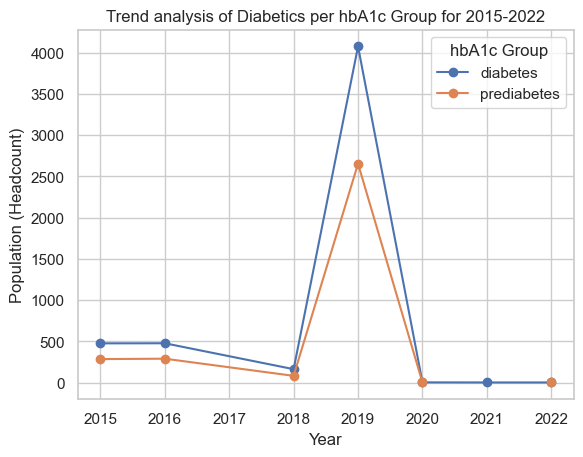

In [49]:
df_population_diabetes_group.columns = rename_last_column(df_population_diabetes_group,"total")


plot_frame = df_population_diabetes_group.pivot_table(values="total",
                   aggfunc="sum", 
                   index=df_population_diabetes_group["year"], 
                   columns=df_population_diabetes_group["group_hbA1c"] 
                  )

plot_frame.columns.name = "hbA1c Group"
plot_stock = plot_frame.plot(style="-o",
            title="Trend analysis of Diabetics per hbA1c Group for 2015-2022")
plot_stock.set_ylabel("Population (Headcount)")
plot_stock.set_xlabel("Year")
tmp = plot_stock.plot()

### Conclusions

**High-Risk Groups** :
   - Age: Older populations ("45-64" and "Over 65").
   - BMI: "Obesity" and "Overweight" groups.
   - Health Conditions: Hypertension and heart disease play a secondary role.
   
**Preventive Focus** :
   - Target populations with high BMI, older age, and comorbidities to prevent and manage diabetes effectively.